Steps:
1. Change dates to date type
2. Remove null values for sampling_date, location and date
3. Make only 3 types

In [ ]:
   from google.colab import drive

   drive.mount('/content/drive')
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
import pandas as pd
import numpy as np



airq = pd.read_csv('/content/drive/MyDrive/Data Science Project/data.csv', encoding = 'latin1')

airq.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435

Date parsing

In [ ]:
indices_to_remove = [435739, 435740, 435741]
airq = airq.drop(indices_to_remove)

airq.loc[148537, 'date'] = pd.to_datetime("2014-9-30")
airq.loc[245191, 'date'] = pd.to_datetime("2014-6-30")
airq.loc[245355, 'date'] = pd.to_datetime("2014-6-30")
airq.loc[284318, 'date'] = pd.to_datetime("2014-11-30")
airq['date'] = pd.to_datetime(airq['date'],format='%Y-%m-%d')
airq['year'] = airq['date'].dt.year # year
airq['year'] = airq['year'].values.astype(int)
min_dt = airq.date.min()
max_dt = airq.date.max()
expected_range = pd.date_range(start = min_dt, end = max_dt, freq='Y' )
expected_range

DatetimeIndex(['1987-12-31', '1988-12-31', '1989-12-31', '1990-12-31',
               '1991-12-31', '1992-12-31', '1993-12-31', '1994-12-31',
               '1995-12-31', '1996-12-31', '1997-12-31', '1998-12-31',
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31',
               '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31',
               '2015-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [ ]:
airq[['so2','year','state']].groupby(["year"]).median().sort_values(by='year',ascending=False).plot(figsize=(20,10))

TypeError: could not convert string to float: 'Bihar'

In [ ]:
airq[['no2', 'year','state']].groupby(["year"]).median().sort_values(by='year', ascending = False).plot(figsize=(20,10))

TypeError: could not convert string to float: 'Bihar'

In [ ]:
airq[['spm','year','state']].groupby(["year"]).median().sort_values(by='year',ascending=False).plot(figsize=(20,10))

TypeError: could not convert string to float: 'Bihar'

In [ ]:
airq[['rspm','year','state']].groupby(["year"]).median().sort_values(by='year',ascending=False).plot(figsize=(20,10))

TypeError: could not convert string to float: 'Bihar'

In [ ]:
airq['type'].replace('Residential, Rural and other Areas','Residential',inplace = True)
airq['type'].replace('Residential and others','Residential',inplace = True)
airq['type'].replace('Industrial Areas','Industrial',inplace = True)
airq['type'].replace('Industrial Area','Industrial',inplace = True)
airq['type'].replace('Sensitive Area','Sensitive',inplace = True)
airq['type'].replace('Sensitive Areas','Sensitive',inplace = True)
airq['type'].value_counts()

type
Residential    265963
Industrial     148071
Sensitive       15011
RIRUO            1304
Name: count, dtype: int64

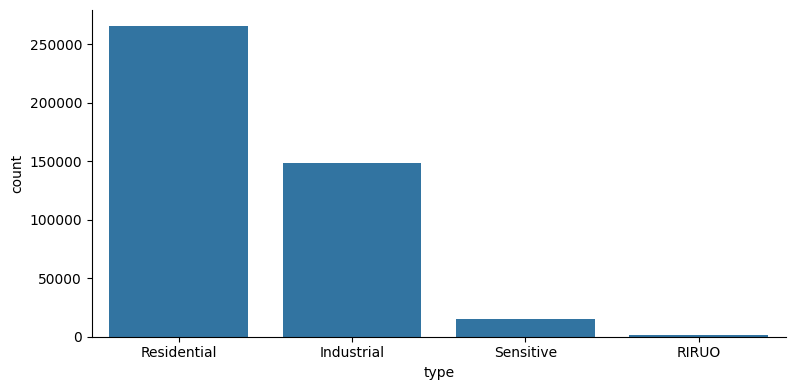

In [ ]:
sns.catplot(x = "type", kind = "count",  data = airq, height=4, aspect = 2)

In [ ]:
airq['state'].value_counts()

state
Maharashtra             60384
Uttar Pradesh           42816
Andhra Pradesh          26368
Punjab                  25634
Rajasthan               25589
Kerala                  24728
Himachal Pradesh        22896
West Bengal             22463
Gujarat                 21279
Tamil Nadu              20597
Madhya Pradesh          19920
Assam                   19361
Odisha                  19279
Karnataka               17119
Delhi                    8551
Chandigarh               8520
Chhattisgarh             7831
Goa                      6206
Jharkhand                5968
Mizoram                  5338
Telangana                3978
Meghalaya                3853
Puducherry               3785
Haryana                  3420
Nagaland                 2463
Bihar                    2275
Uttarakhand              1961
Jammu & Kashmir          1289
Daman & Diu               782
Dadra & Nagar Haveli      634
Uttaranchal               285
Arunachal Pradesh          90
Manipur                    76
Sikk

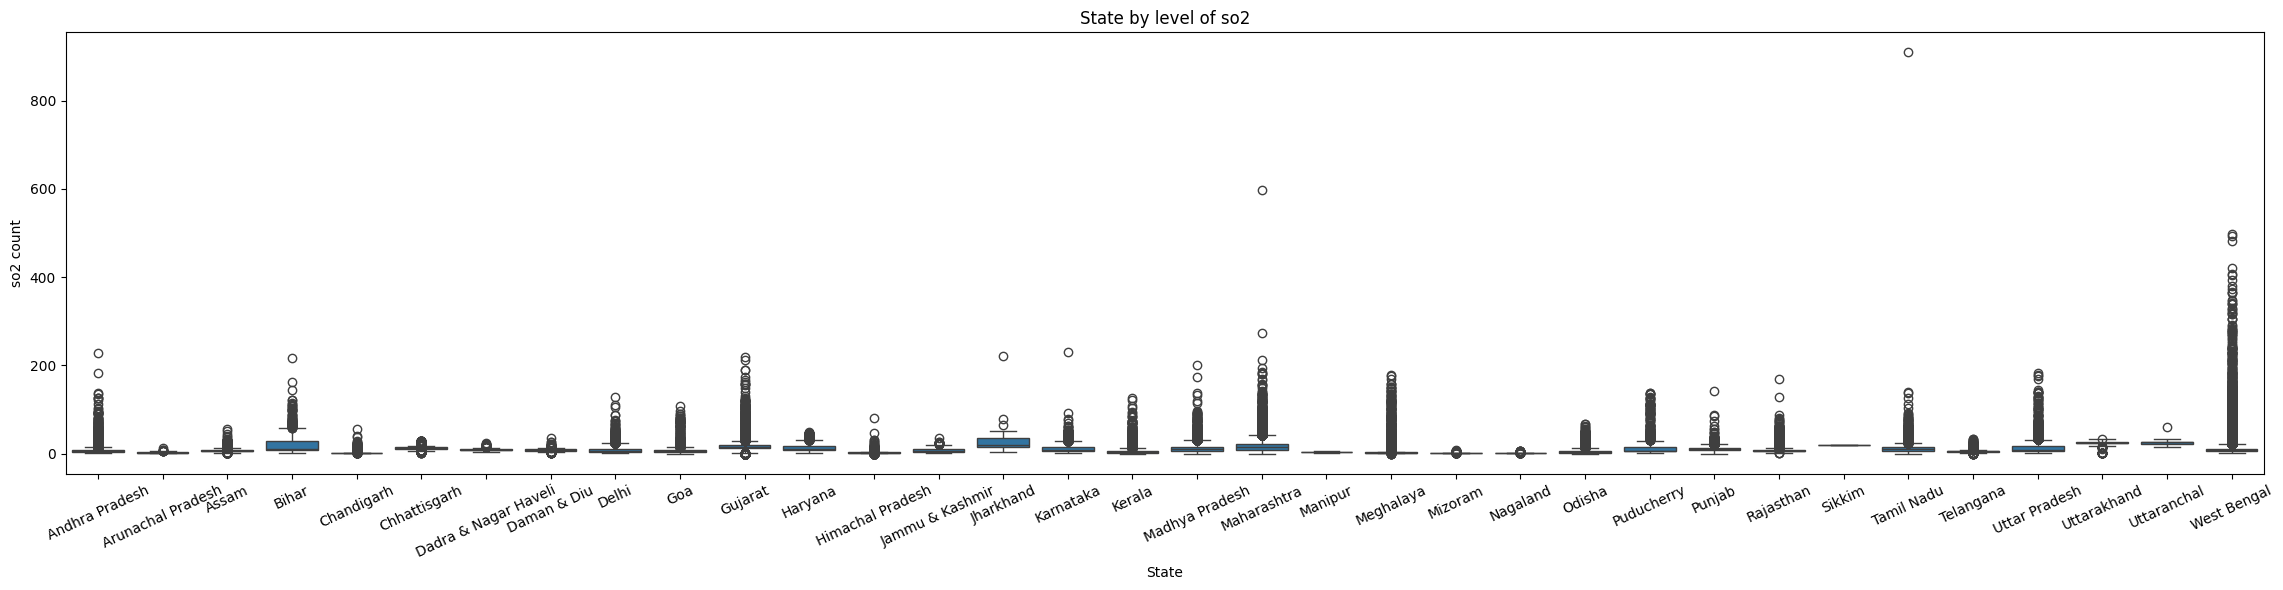

In [ ]:
plt.figure(figsize=(23, 6))
sns.boxplot(data=airq, x='state', y='so2')
plt.title('State by level of so2')
plt.xlabel('State')
plt.ylabel('so2 count')
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

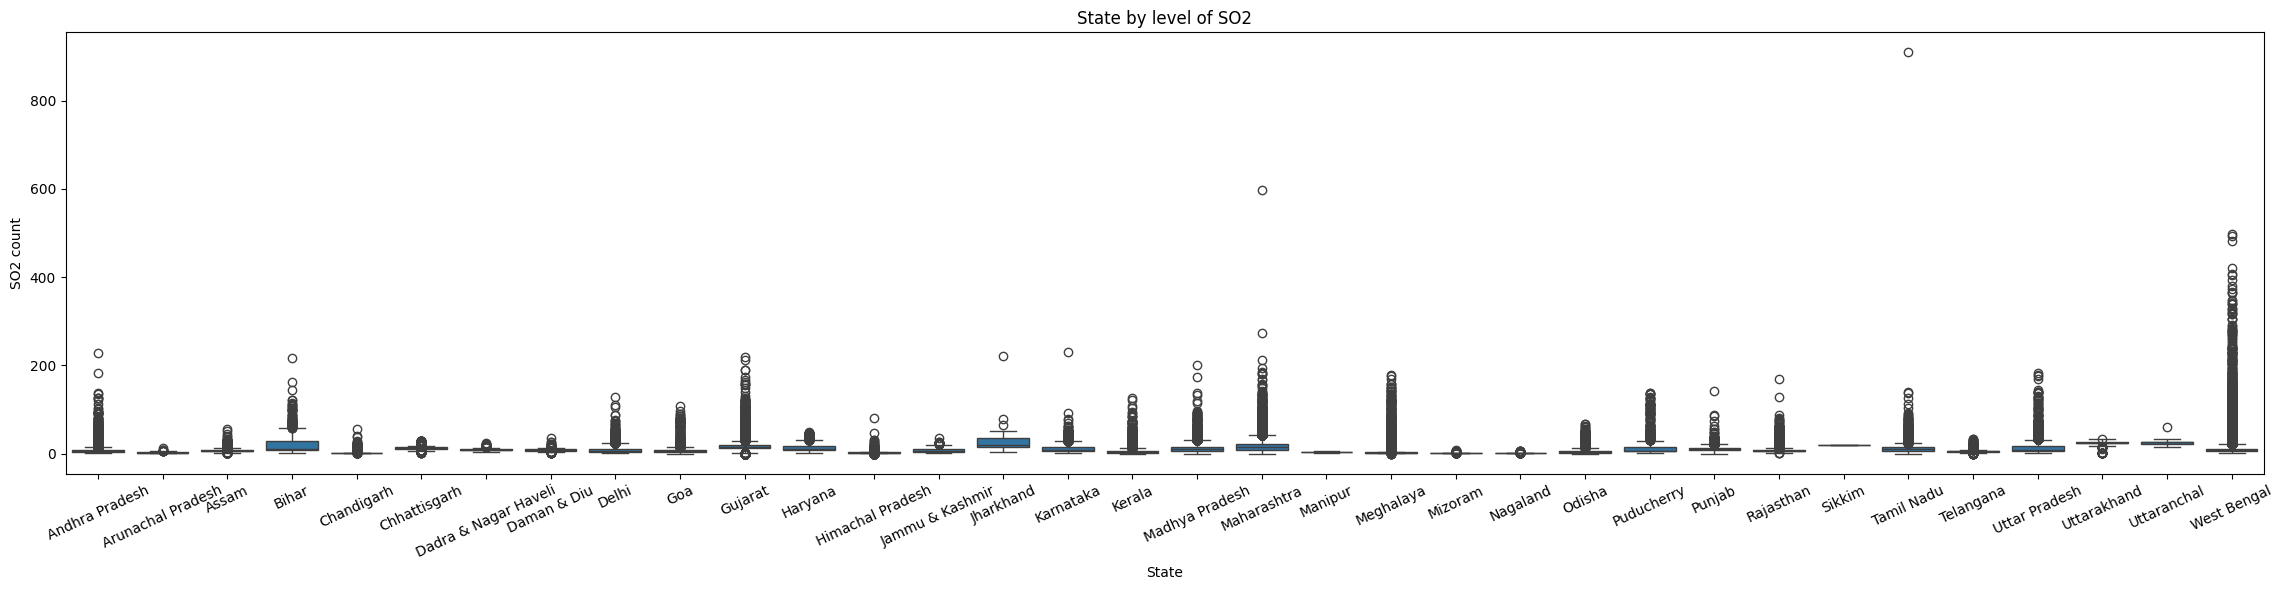

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(23, 6))
sns.boxplot(data=airq, x='state', y='so2')
plt.title('State by level of SO2')
plt.xlabel('State')
plt.ylabel('SO2 count')
plt.xticks(rotation=25)
#plt.ylim(0, 80)  # Limit the y-axis range
plt.tight_layout()
plt.show()

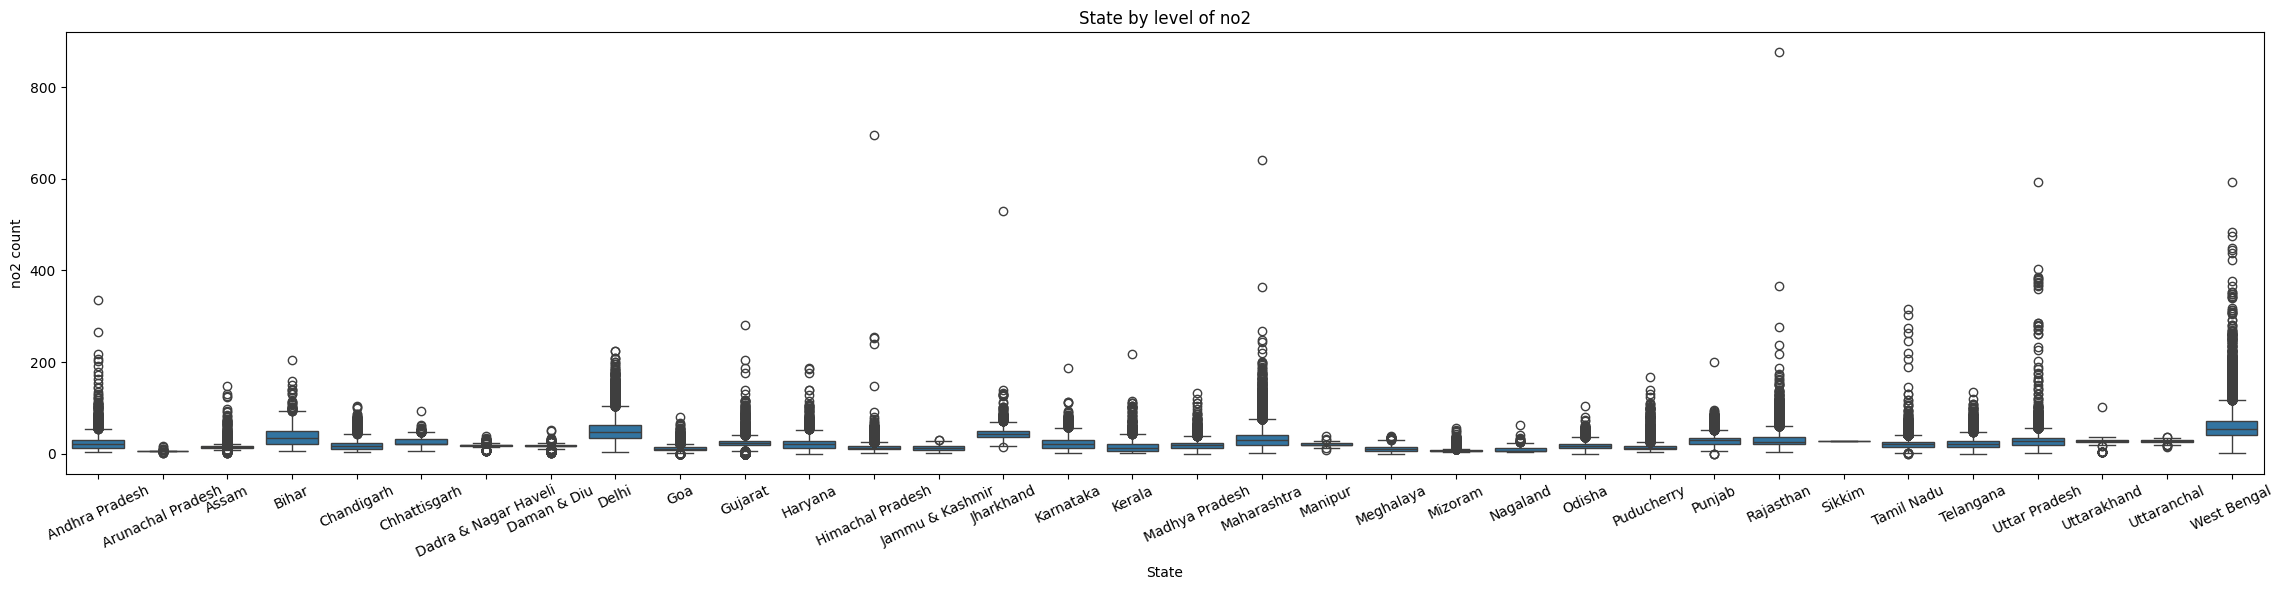

In [ ]:
plt.figure(figsize=(23, 6))
sns.boxplot(data=airq, x='state', y='no2')
plt.title('State by level of no2')
plt.xlabel('State')
plt.ylabel('no2 count')
plt.xticks(rotation=25)
#plt.ylim(0, 200)
plt.tight_layout()
plt.show()

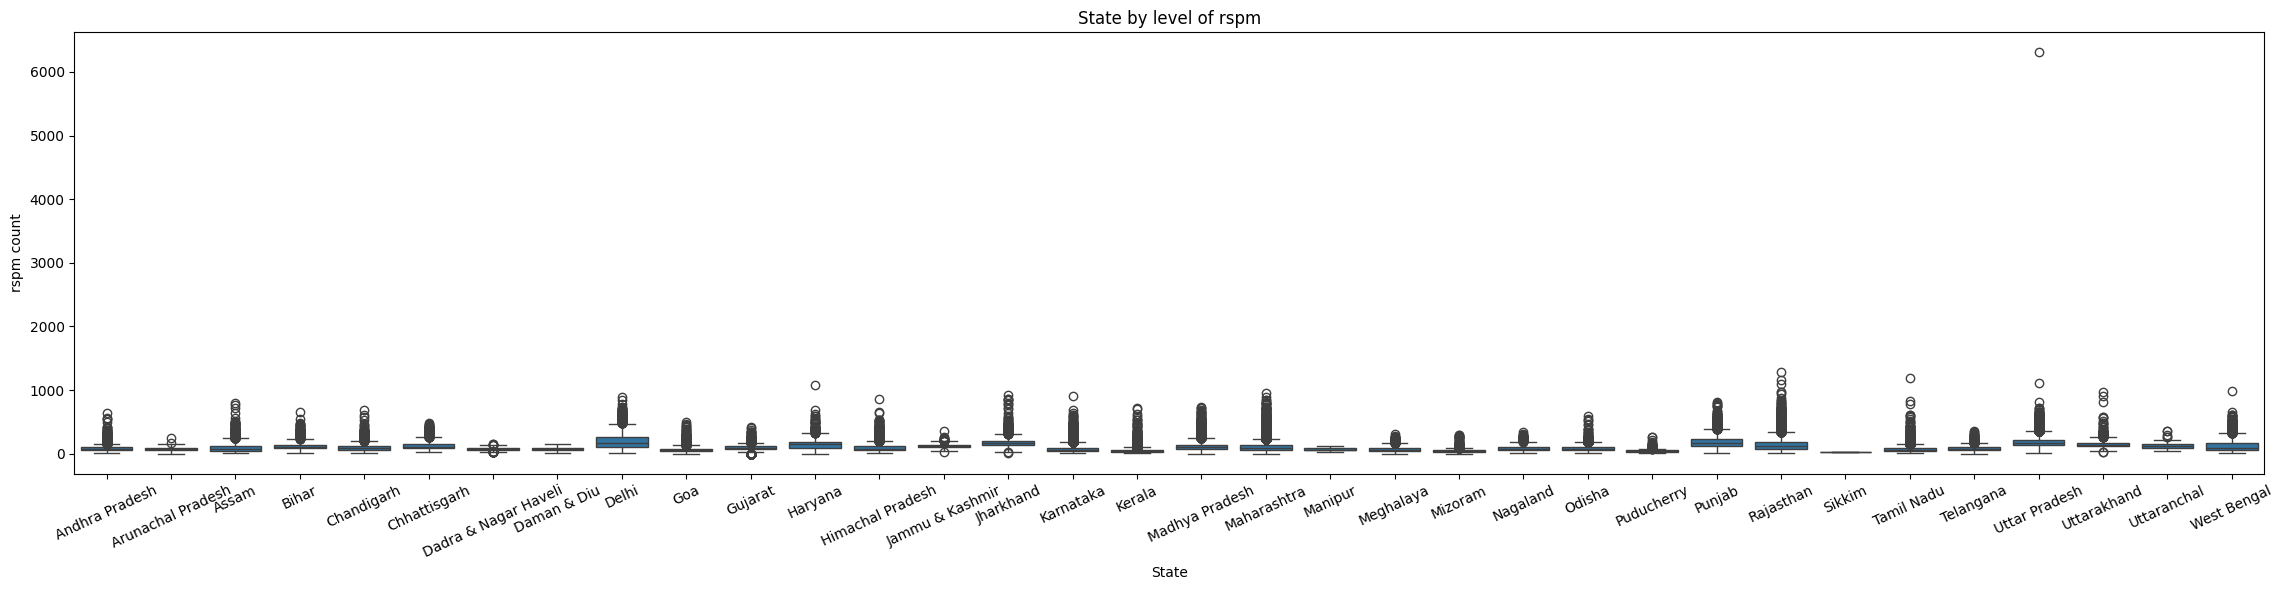

In [ ]:
plt.figure(figsize=(23, 6))
sns.boxplot(data=airq, x='state', y='rspm')
plt.title('State by level of rspm')
plt.xlabel('State')
plt.ylabel('rspm count')
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

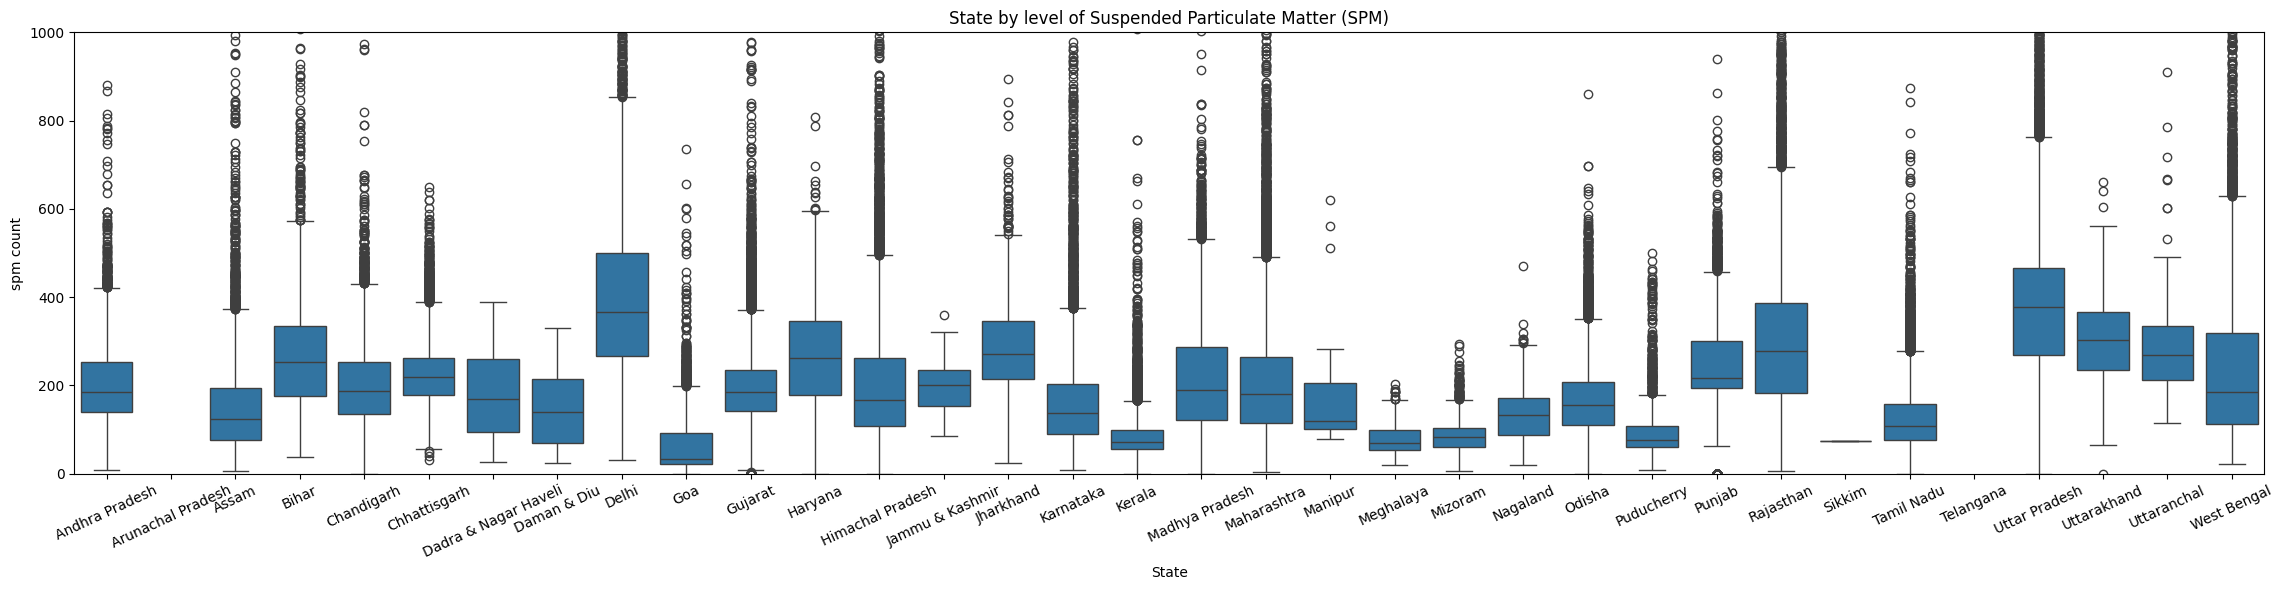

In [ ]:
plt.figure(figsize=(23, 6))
sns.boxplot(data=airq, x='state', y='spm')
plt.title('State by level of Suspended Particulate Matter (SPM)')
plt.xlabel('State')
plt.ylabel('spm count')
plt.xticks(rotation=25)
plt.ylim(0, 1000)
plt.tight_layout()
plt.show()

In [ ]:
grouped_data = airq.groupby('state').agg({'so2': 'mean', 'no2': 'mean', 'rspm': 'mean', 'spm': 'mean'}).reset_index()
grouped_data

state        so2        no2        rspm         spm
0         Andhra Pradesh   7.284845  21.704451   78.182824  200.260378
1      Arunachal Pradesh   3.179104   5.469697   76.629213         NaN
2                  Assam   6.723263  14.793691   93.724912  153.355386
3                  Bihar  19.381476  36.575525  123.705176  276.917416
4             Chandigarh   2.676986  18.619404   96.587079  206.056150
5           Chhattisgarh  12.846609  24.815961  126.472399  231.290969
6   Dadra & Nagar Haveli   8.939587  18.293959   76.536530  170.545024
7            Daman & Diu   8.192958  16.168926   73.749431  145.681416
8                  Delhi   8.737273  53.489147  196.639771  399.402088
9                    Goa   6.827913  12.506337   61.212766   67.254193
10               Gujarat  16.656343  24.065631   98.244510  191.567930
11               Haryana  14.064957  23.428311  149.860537  268.264804
12      Himachal Pradesh   2.667013  13.658688   91.870202  208.575630
13       Jammu & Kashmir   7.180521  12.213181  117.449483  196.221053
14             Jharkhand  23.485794  43.366341  168.517763  277.940746
15             Karnataka  10.223099  22.702837   79.371801  168.001743
16                Kerala   5.322350  14.421889   50.636064   84.419791
17        Madhya Pradesh  11.587410  18.639596  114.717967  210.067545
18           Maharashtra  17.366863  32.115370  101.479608  205.255823
19               Manipur   3.900000  20.173684   69.815789  158.657895
20             Meghalaya   8.955908  10.659706   68.988442   78.002445
21               Mizoram   2.085009   6.682171   42.716466   87.833333
22              Nagaland   2.059736   8.947265   83.357027  133.311449
23                Odisha   5.275874  16.899568   83.619824  167.609844
24            Puducherry  11.970639  15.279496   43.418217   95.598188
25                Punjab  10.628598  28.085846  173.493711  244.918926
26             Rajasthan   7.665725  30.441008  142.016832  300.735397
27                Sikkim  19.800000  26.800000   32.000000   75.000000
28            Tamil Nadu  11.315134  21.601202   66.585638  126.729064
29             Telangana   5.418609  23.864005   85.043008         NaN
30         Uttar Pradesh  12.528500  27.610095  176.952308  372.663688
31           Uttarakhand  24.372957  26.938090  148.978906  306.758923
32           Uttaranchal  24.697736  27.163019  121.694340  283.335714
33           West Bengal  12.608766  59.075731  115.039909  233.506524

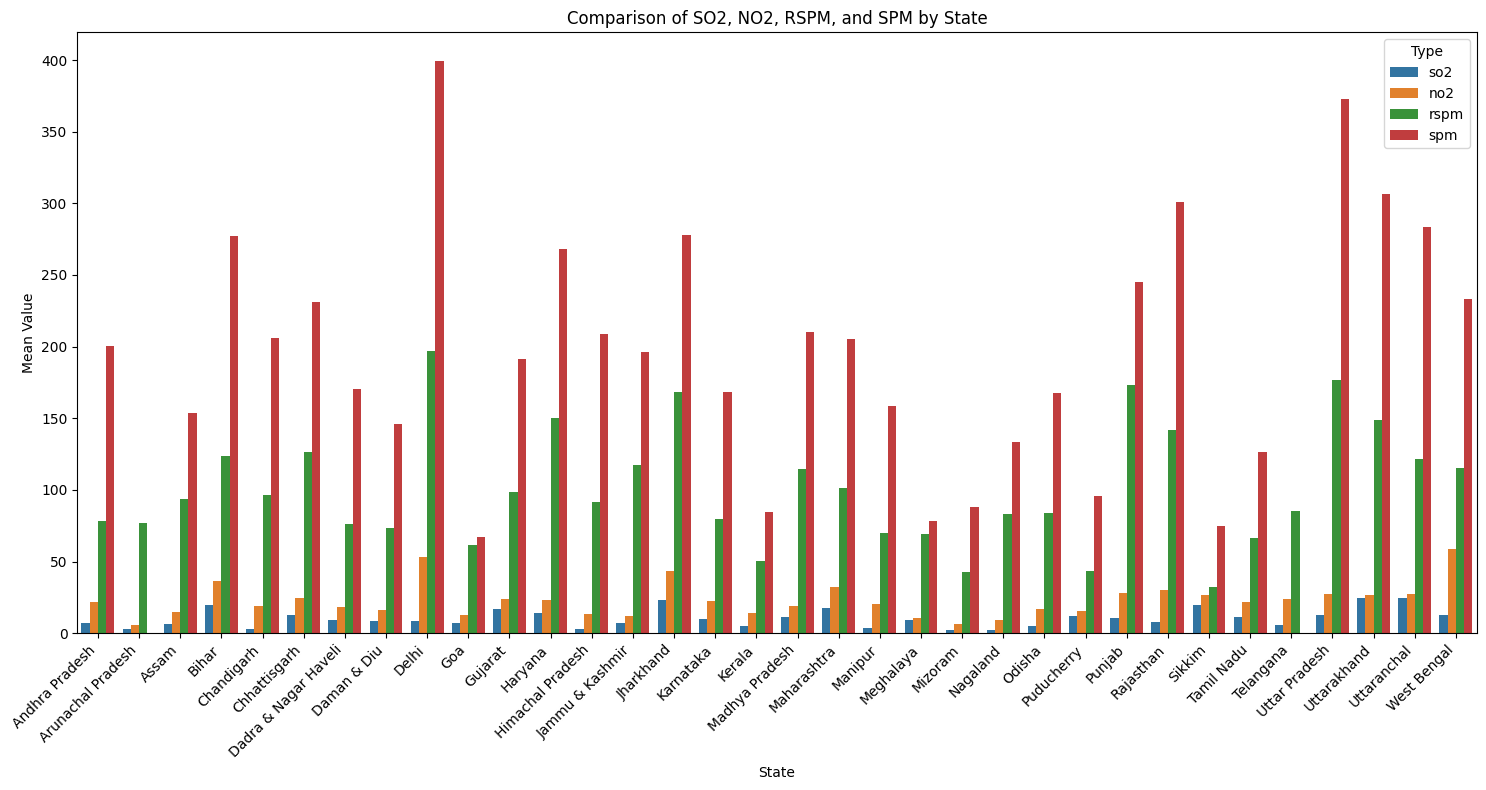

In [ ]:
grouped_data = airq.groupby('state').agg({'so2': 'mean', 'no2': 'mean', 'rspm': 'mean', 'spm': 'mean'}).reset_index()

# Melt the DataFrame to long format
melted_data = pd.melt(grouped_data, id_vars=['state'], var_name='type', value_name='value')

# Plot
plt.figure(figsize=(15, 8))
sns.barplot(data=melted_data, x='state', y='value', hue='type')
plt.title('Comparison of SO2, NO2, RSPM, and SPM by State')
plt.xlabel('State')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Type')
plt.show()

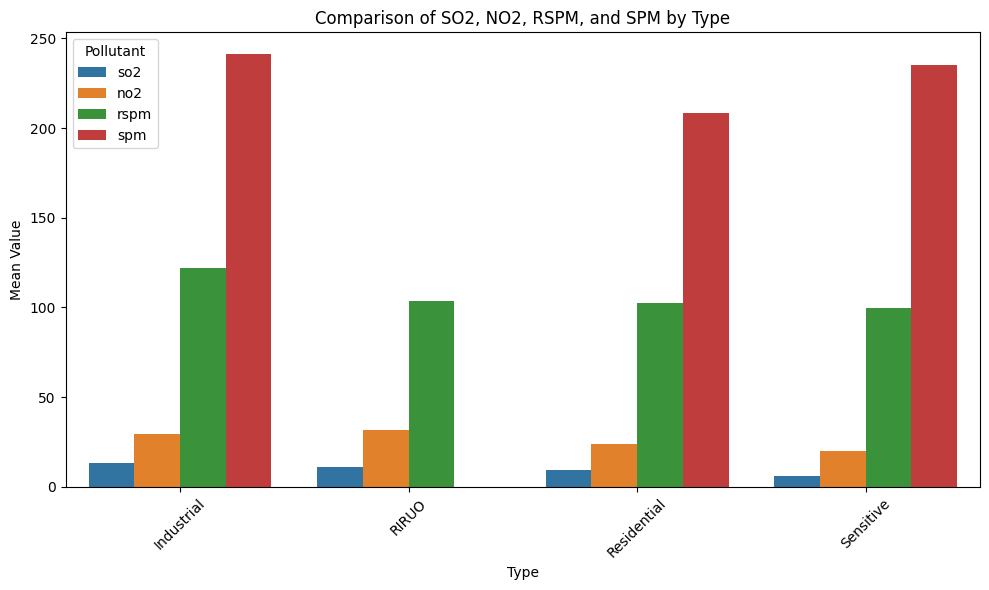

In [ ]:

# Group the data by 'type' and calculate the mean or median values for each pollutant
grouped_data = airq.groupby('type').agg({'so2': 'mean', 'no2': 'mean', 'rspm': 'mean', 'spm': 'mean'}).reset_index()

# Melt the DataFrame to long format
melted_data = pd.melt(grouped_data, id_vars=['type'], var_name='pollutant', value_name='value')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='type', y='value', hue='pollutant')
plt.title('Comparison of SO2, NO2, RSPM, and SPM by Type')
plt.xlabel('Type')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Pollutant')
plt.show()


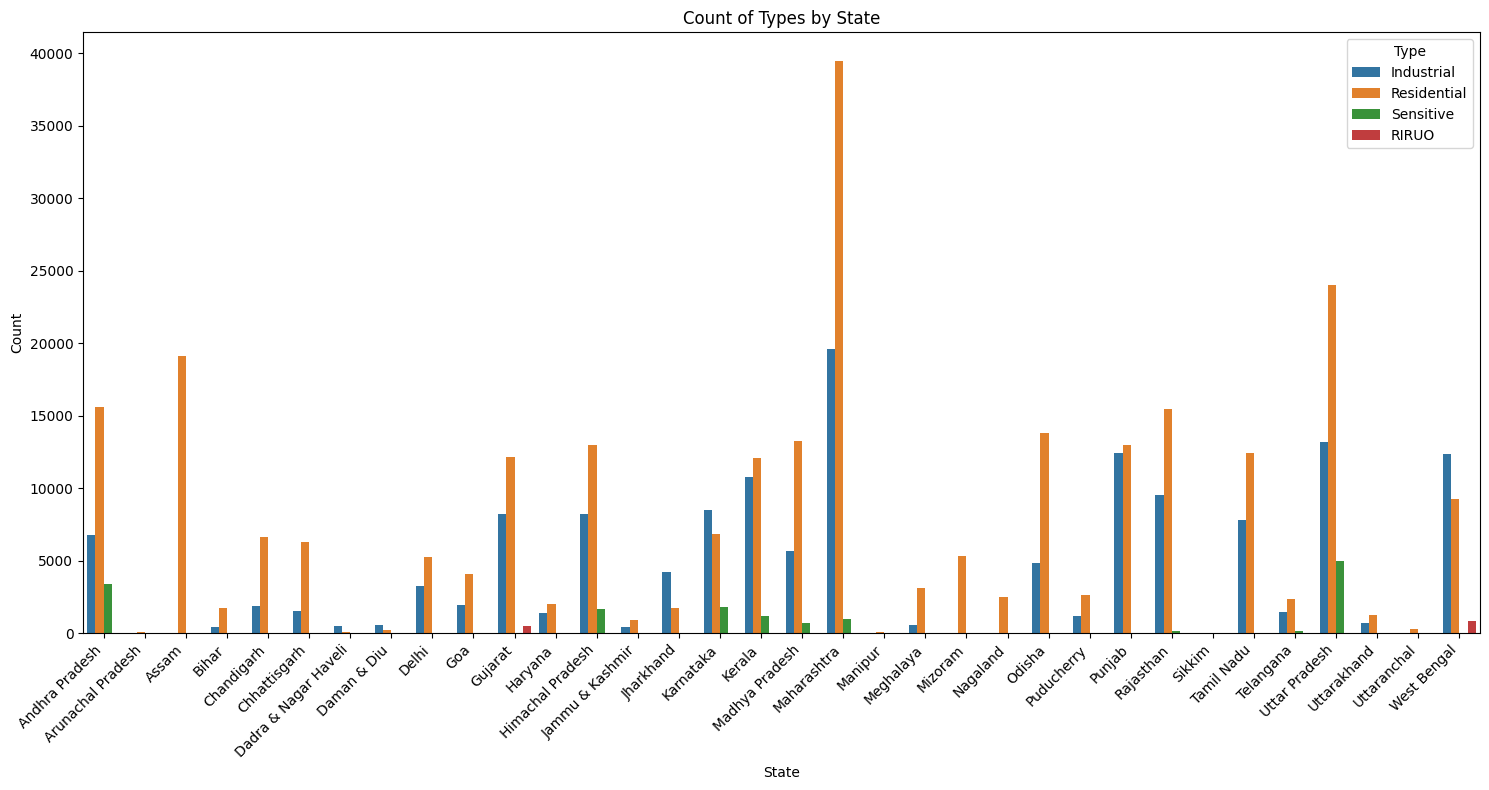

In [ ]:
grouped_data = airq.groupby(['state', 'type']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(15, 8))
sns.barplot(data=grouped_data, x='state', y='count', hue='type')
plt.title('Count of Types by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Type')
plt.show()

In [ ]:
unique_sensitive_states = airq.loc[airq['type'] == 'RIRUO', 'state'].unique()
print(unique_sensitive_states)
airq[airq['type']=='Sensitive'].sample(10)
airq[airq['type'] == 'Sensitive'].value_counts()

['Gujarat' 'West Bengal']


Series([], Name: count, dtype: int64)

In [ ]:
#print(airq.isnull().sum())
airq_m = airq.copy()
#forward filling so2,no2, and rspm
airq_m['so2'] = airq_m['so2'].fillna(method="ffill")
airq_m['no2'] = airq_m['no2'].fillna(method="ffill")
airq_m['rspm'] = airq_m['rspm'].fillna(method="bfill")

#print(airq_m.isnull().sum())

airq_m = airq_m.drop(columns=['stn_code', 'sampling_date', 'agency', 'location_monitoring_station', 'pm2_5', 'spm'])
airq_m = airq_m.dropna()
airq_m = airq_m[~airq_m['type'].isin(['RIRUO', 'Sensitive'])]
#print(airq_m.info())
airq_m.isnull().sum()


state       0
location    0
type        0
so2         0
no2         0
rspm        0
date        0
year        0
dtype: int64

Dropping 'stn_code', 'sampling_date', 'agency' and 'location_monitoring_station' because they aren't revelant to our analysis.

ropping pm2_5 and spm because they are missing before 50%-90% of their rows.

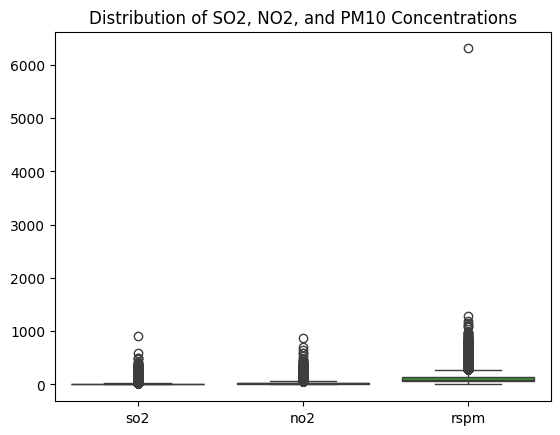

In [ ]:
sns.boxplot(data=airq_m[["so2", "no2", "rspm"]])
plt.title("Distribution of SO2, NO2, and PM10 Concentrations")
plt.show()


Rows with 'RSPM' above 2000:
Index([389753], dtype='int64')


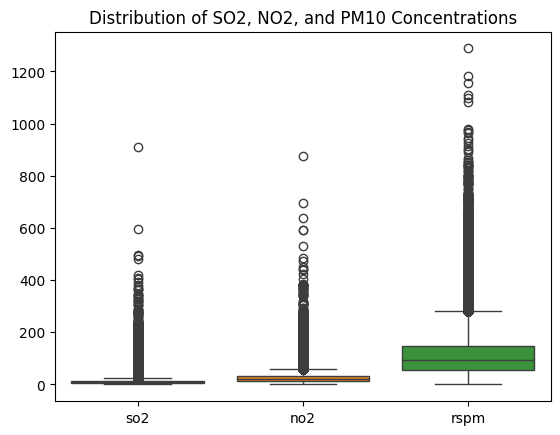

In [ ]:
outlier_rows = airq_m[airq_m["rspm"] > 2000].index

print("Rows with 'RSPM' above 2000:")
print(outlier_rows)

airq_m = airq_m.drop(outlier_rows)

sns.boxplot(data=airq_m[["so2", "no2", "rspm"]])
plt.title("Distribution of SO2, NO2, and PM10 Concentrations")
plt.show()


Dropping all empty values of type and all values with type RIRUO or Sensitive because together they make up less than 4% of the data. We will focus on only Industrial and Residential.

Now I'm going to enocde the 3 categorical data types.

In [ ]:
airq_f = airq_m.copy()
cat_cols = [c for c in airq_f.columns if airq_f[c].dtype == 'object']
cat_data = airq_f[cat_cols]
cat_cols

['state', 'location', 'type']

In [ ]:
final_data = pd.get_dummies(airq_f, columns=cat_cols,dtype=int)
final_data.shape

(414033, 324)

In [ ]:
 final_data

so2   no2   rspm       date  year  state_Andhra Pradesh  \
0        4.8  17.4  143.7 1990-02-01  1990                     1   
1        3.1   7.0  143.7 1990-02-01  1990                     1   
2        6.2  28.5  143.7 1990-02-01  1990                     1   
3        6.3  14.7  143.7 1990-03-01  1990                     1   
4        4.7   7.5  143.7 1990-03-01  1990                     1   
...      ...   ...    ...        ...   ...                   ...   
434903   8.0  58.0  159.0 2015-12-18  2015                     0   
434904   8.0  60.0  136.0 2015-12-21  2015                     0   
434905   8.0  60.0  140.0 2015-12-24  2015                     0   
434906   8.0  71.0  169.0 2015-12-27  2015                     0   
434907  12.0  72.0  248.0 2015-12-30  2015                     0   

        state_Arunachal Pradesh  state_Assam  state_Bihar  state_Chandigarh  \
0                             0            0            0                 0   
1                             0            0            0                 0   
2                             0            0            0                 0   
3                             0            0            0                 0   
4                             0            0            0                 0   
...                         ...          ...          ...               ...   
434903                        0            0            0                 0   
434904                        0            0            0                 0   
434905                        0            0            0                 0   
434906                        0            0            0                 0   
434907                        0            0            0                 0   

        ...  location_Vasco  location_Vijayawada  location_Visakhapatnam  \
0       ...               0                    0                       0   
1       ...               0                    0                       0   
2       ...               0                    0                       0   
3       ...               0                    0                       0   
4       ...               0                    0                       0   
...     ...             ...                  ...                     ...   
434903  ...               0                    0                       0   
434904  ...               0                    0                       0   
434905  ...               0                    0                       0   
434906  ...               0                    0                       0   
434907  ...               0                    0                       0   

        location_Vizianagaram  location_Warangal  location_West Singhbhum  \
0                           0                  0                        0   
1                           0                  0                        0   
2                           0                  0                        0   
3                           0                  0                        0   
4                           0                  0                        0   
...                       ...                ...                      ...   
434903                      0                  0                        0   
434904                      0                  0                        0   
434905                      0                  0                        0   
434906                      0                  0                        0   
434907                      0                  0                        0   

        location_Yamuna Nagar  location_Yamunanagar  type_Industrial  \
0                           0                     0                0   
1                           0                     0                1   
2                           0                     0                0   
3                           0                     0                0   
4                           0                

In [ ]:
airq_c = airq_m.copy()
# Standardize the relevant columns for clustering (SO2, NO2, RSPM)
features = ['so2', 'no2', 'rspm']
# Normalize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(airq_c[features])

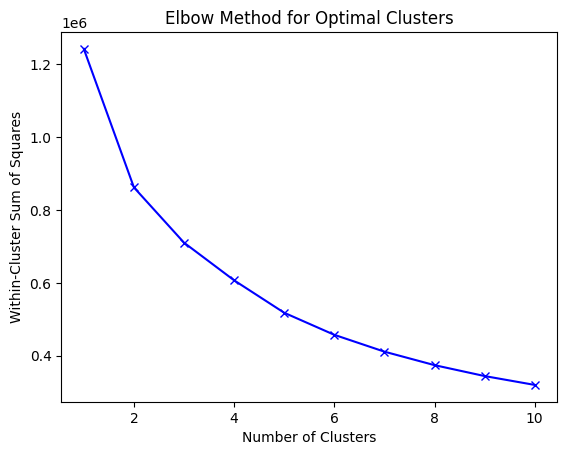

In [ ]:
wcss = []
for k in range(1, 11):  # Test a range of possible clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [ ]:
# Set the number of clusters
num_clusters = 2

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the data
airq_c['cluster'] = cluster_labels

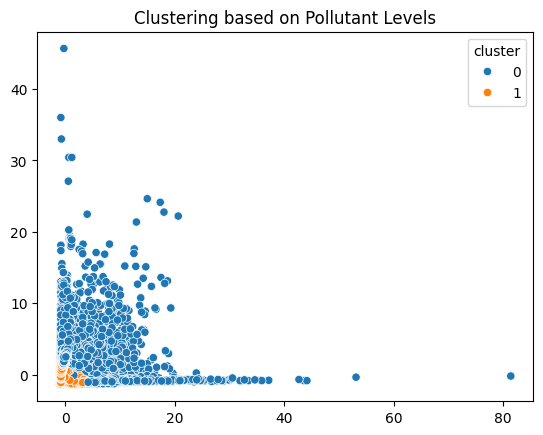

In [ ]:
# Scatter plot of clusters
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=airq_c['cluster'])
plt.title("Clustering based on Pollutant Levels")
plt.show()

In [ ]:
airq_1 = airq_m.copy()

In [ ]:
# Calculate Z-scores for SO2, NO2, and RSPM
z_scores = np.abs((airq_c[['so2', 'no2', 'rspm']] - airq_c[['so2', 'no2', 'rspm']].mean()) / airq_c[['so2', 'no2', 'rspm']].std())

# Identify rows where any Z-score is above the threshold
outliers = airq_c[(z_scores > 15).any(axis=1)]
print(outliers)

                 state       location         type    so2    no2   rspm  \
10456   Andhra Pradesh  Visakhapatnam   Industrial  182.2   19.5  161.0   
17065   Andhra Pradesh  Visakhapatnam  Residential  228.0   29.0   57.0   
46404            Bihar         Jharia   Industrial  216.6   48.1   79.0   
81669          Gujarat     Ankleshwar   Industrial  219.1   80.5    0.0   
81797          Gujarat     Ankleshwar  Residential  190.2   32.3    0.0   
...                ...            ...          ...    ...    ...    ...   
433147     West Bengal        Kolkata  Residential   46.0  341.0  222.0   
433157     West Bengal       Calcutta  Residential   24.0  377.0  155.0   
433451     West Bengal        Kolkata   Industrial  153.0  308.0  216.0   
433458     West Bengal        Kolkata   Industrial   73.0  344.0  153.0   
433459     West Bengal        Kolkata   Industrial   57.0  319.0  190.0   

             date  year  cluster  
10456  2009-04-01  2009        0  
17065  2012-08-08  2012      

*Use feature weighing to see whats important.

after mids from here


1. Calculating pollutant indexes for each pollutant

2. Creating a function to calculate Air Quality Index (AQI)

3. Categorizing the regions based on AQI



SO2 pollutant index

In [ ]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
airq_m['SOi']=airq_m['so2'].apply(cal_SOi)
data= airq_m[['so2','SOi']]
data.sample(20)

so2     SOi
320843   5.0   6.250
280960   2.0   2.500
29953    2.8   3.500
284740   2.0   2.500
313844  13.0  16.250
108730   3.6   4.500
279528   2.0   2.500
330813   3.8   4.750
2785     7.6   9.500
289187  23.0  28.750
85927   28.2  35.250
166421   2.0   2.500
139647   2.4   3.000
150322   6.0   7.500
256730  11.0  13.750
371260  17.0  21.250
55910    2.0   2.500
413982   6.0   7.500
85376   21.9  27.375
208119  10.5  13.125

NO2 pollutant index

In [ ]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
airq_m['Noi']=airq_m['no2'].apply(cal_Noi)
data= airq_m[['no2','Noi']]
data.sample(20)

no2        Noi
265971   5.000000   6.250000
315372  33.000000  41.250000
431251  12.000000  15.000000
364632  30.000000  37.500000
168936  25.800000  32.250000
41976   13.000000  16.250000
157908  19.600000  24.500000
189473  35.000000  43.750000
134266  41.051667  51.314583
164421  25.000000  31.250000
223816  14.000000  17.500000
45870   21.700000  27.125000
147273  14.000000  17.500000
410490  41.000000  51.250000
244091  39.000000  48.750000
146715  13.000000  16.250000
341916  35.000000  43.750000
247663  27.000000  33.750000
374787   9.700000  12.125000
228911  40.000000  50.000000

RSPM Pollutant index

In [ ]:
def cal_RSPMI(rspm):
    rpi = 0
    if rspm <= 30:
        rpi = rspm * 50 / 30
    elif rspm > 30 and rspm <= 60:
        rpi = 50 + (rspm - 30) * 50 / 30
    elif rspm > 60 and rspm <= 90:
        rpi = 100 + (rspm - 60) * 100 / 30
    elif rspm > 90 and rspm <= 120:
        rpi = 200 + (rspm - 90) * 100 / 30
    elif rspm > 120 and rspm <= 250:
        rpi = 300 + (rspm - 120) * 100 / 130
    else:
        rpi = 400 + (rspm - 250) * 100 / 130
    return rpi
airq_m['Rpi'] = airq_m['rspm'].apply(cal_RSPMI)
data = airq_m[['rspm', 'Rpi']]
data.sample(20)

rspm         Rpi
303660  220.000000  376.923077
52880    67.000000  123.333333
89069   142.000000  316.923077
199110   93.000000  210.000000
164225   46.000000   76.666667
258269   58.000000   96.666667
322321  211.000000  370.000000
340759  187.000000  351.538462
404928  161.000000  331.538462
116561   65.000000  116.666667
392483  215.000000  373.076923
350071   83.000000  176.666667
170105   54.000000   90.000000
366447  153.000000  325.384615
258820   56.666667   94.444444
334693  101.000000  236.666667
69728   106.000000  253.333333
175284   43.000000   71.666667
185173  245.000000  396.153846
34849    52.000000   86.666667

SPM pollutant index- removed



function to calculate the air quality index (AQI) of every data value

In [ ]:
def cal_aqi(si, ni, rpi):
    aqi = 0
    if (si >= ni and si >= rpi):
        aqi = si
    elif (ni >= si and ni >= rpi):
        aqi = ni
    elif (rpi >= si and rpi >= ni):
        aqi = rpi
    return aqi

airq_m['AQI'] = airq_m.apply(lambda x: cal_aqi(x['SOi'], x['Noi'], x['Rpi']), axis=1)
data = airq_m[['state', 'SOi', 'Noi', 'Rpi', 'AQI']]
data.head()

state    SOi     Noi         Rpi         AQI
0  Andhra Pradesh  6.000  21.750  318.230769  318.230769
1  Andhra Pradesh  3.875   8.750  318.230769  318.230769
2  Andhra Pradesh  7.750  35.625  318.230769  318.230769
3  Andhra Pradesh  7.875  18.375  318.230769  318.230769
4  Andhra Pradesh  5.875   9.375  318.230769  318.230769

defining AQI ranges

In [ ]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

airq_m['AQI_Range'] = airq_m['AQI'] .apply(AQI_Range)
airq_m.tail(20)

state  location        type   so2   no2   rspm       date  year  \
434888  West Bengal  Raniganj  Industrial   8.0  64.0  111.0 2015-10-27  2015   
434889  West Bengal  Raniganj  Industrial   7.0  51.0   67.0 2015-10-30  2015   
434890  West Bengal  Raniganj  Industrial   7.0  53.0   80.0 2015-11-02  2015   
434891  West Bengal  Raniganj  Industrial   7.0  55.0   95.0 2015-11-05  2015   
434892  West Bengal  Raniganj  Industrial  11.0  68.0  150.0 2015-11-10  2015   
434893  West Bengal  Raniganj  Industrial  11.0  68.0  117.0 2015-11-11  2015   
434894  West Bengal  Raniganj  Industrial   8.0  56.0  116.0 2015-11-17  2015   
434895  West Bengal  Raniganj  Industrial   8.0  63.0  155.0 2015-11-19  2015   
434896  West Bengal  Raniganj  Industrial   8.0  58.0  148.0 2015-11-22  2015   
434897  West Bengal  Raniganj  Industrial   7.0  60.0  150.0 2015-11-25  2015   
434898  West Bengal  Raniganj  Industrial   7.0  54.0  118.0 2015-11-30  2015   
434899  West Bengal  Raniganj  Industrial   8.0  58.0  149.0 2015-12-04  2015   
434900  West Bengal  Raniganj  Industrial   7.0  55.0  129.0 2015-12-07  2015   
434901  West Bengal  Raniganj  Industrial   9.0  61.0  194.0 2015-12-12  2015   
434902  West Bengal  Raniganj  Industrial   7.0  55.0  125.0 2015-12-15  2015   
434903  West Bengal  Raniganj  Industrial   8.0  58.0  159.0 2015-12-18  2015   
434904  West Bengal  Raniganj  Industrial   8.0  60.0  136.0 2015-12-21  2015   
434905  West Bengal  Raniganj  Industrial   8.0  60.0  140.0 2015-12-24  2015   
434906  West Bengal  Raniganj  Industrial   8.0  71.0  169.0 2015-12-27  2015   
434907  West Bengal  Raniganj  Industrial  12.0  72.0  248.0 2015-12-30  2015   

          SOi    Noi         Rpi         AQI       AQI_Range  
434888  10.00  80.00  270.000000  270.000000       Unhealthy  
434889   8.75  63.75  123.333333  123.333333            Poor  
434890   8.75  66.25  166.666667  166.666667            Poor  
434891   8.75  68.75  216.666667  216.666667       Unhealthy  
434892  13.75  85.00  323.076923  323.076923  Very unhealthy  
434893  13.75  85.00  290.000000  290.000000       Unhealthy  
434894  10.00  70.00  286.666667  286.666667       Unhealthy  
434895  10.00  78.75  326.923077  326.923077  Very unhealthy  
434896  10.00  72.50  321.538462  321.538462  Very unhealthy  
434897   8.75  75.00  323.076923  323.076923  Very unhealthy  
434898   8.75  67.50  293.333333  293.333333       Unhealthy  
434899  10.00  72.50  322.307692  322.307692  Very unhealthy  
434900   8.75  68.75  306.923077  306.923077  Very unhealthy  
434901  11.25  76.25  356.923077  356.923077  Very unhealthy  
434902   8.75  68.75  303.846154  303.846154  Very unhealthy  
434903  10.00  72.50  330.000000  330.000000  Very unhealthy  
434904  10.00  75.00  312.307692  312.307692  Very unhealthy  
434905  10.00  75.00  315.384615  315.384615  Very unhealthy  
434906  10.00  88.75  337.692308  337.692308  Very unhealthy  
434907  15.00  90.00  398.461538  398.461538  Very unhealthy

In [ ]:
X=airq_m[['SOi','Noi','Rpi']]
Y=airq_m['AQI']
X.head()
Y.head()

0    318.230769
1    318.230769
2    318.230769
3    318.230769
4    318.230769
Name: AQI, dtype: float64

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(331226, 3) (82807, 3) (331226,) (82807,)


Linear Regression

In [ ]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  5.269523321145898
RMSE TestData =  5.103765276394435
--------------------------------------------------
RSquared value on train: 0.9981916296381512
RSquared value on test: 0.9983033594660915


Decision Tree regressor

In [ ]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  2.447578149985567e-12
RMSE TestData =  1.2083953346584535
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.9999048899231755


Random Forest Regressor

In [ ]:
RF=RandomForestRegressor().fit(X_train,Y_train)

In [ ]:
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.42371554239005266
RMSE TestData =  1.0928709339768952
--------------------------------------------------
RSquared value on train: 0.9999883078734244
RSquared value on test: 0.9999222059818443


In [ ]:
airq_m.info()


<class 'pandas.core.frame.DataFrame'>
Index: 414033 entries, 0 to 434907
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   state      414033 non-null  object        
 1   location   414033 non-null  object        
 2   type       414033 non-null  object        
 3   so2        414033 non-null  float64       
 4   no2        414033 non-null  float64       
 5   rspm       414033 non-null  float64       
 6   date       414033 non-null  datetime64[ns]
 7   year       414033 non-null  int64         
 8   SOi        414033 non-null  float64       
 9   Noi        414033 non-null  float64       
 10  Rpi        414033 non-null  float64       
 11  AQI        414033 non-null  float64       
 12  AQI_Range  414033 non-null  object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(4)
memory usage: 44.2+ MB


In [ ]:
desired_columns = ['SOi', 'Noi', 'Rpi', 'state']
df = airq_m[desired_columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414033 entries, 0 to 434907
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   SOi     414033 non-null  float64
 1   Noi     414033 non-null  float64
 2   Rpi     414033 non-null  float64
 3   state   414033 non-null  object 
dtypes: float64(3), object(1)
memory usage: 15.8+ MB


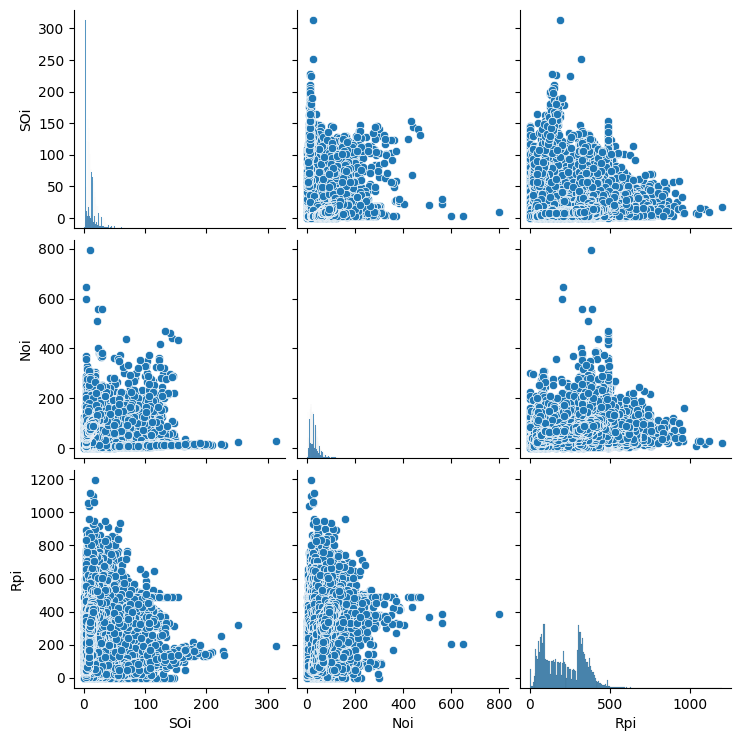

In [ ]:
cols = df.columns[:-1]
sns.pairplot(df[cols])

In [ ]:
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])
pd.DataFrame(X_scaled, columns=cols).describe()

SOi            Noi            Rpi
count  414033.000000  414033.000000  414033.000000
mean        0.042070       0.040253       0.177820
std         0.039052       0.028056       0.104002
min         0.000000       0.000000       0.000000
25%         0.019131       0.021967       0.077878
50%         0.031885       0.034362       0.172443
75%         0.053009       0.050366       0.267009
max         1.000000       1.000000       1.000000

In [ ]:
inertia_score=[]
for k in range(2,8):
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans.fit(X_scaled)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  inertia = kmeans.inertia_
  inertia_score.append(inertia)

Text(0, 0.5, 'Inertia')

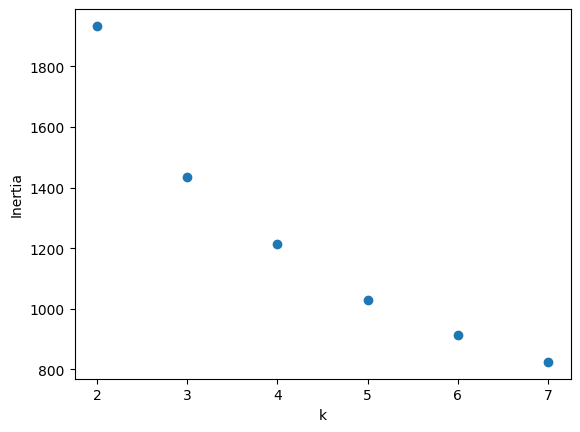

In [ ]:
plt.scatterplot(list(range(2,8)),inertia_score)
plt.xlabel('k')
plt.ylabel('Inertia')

In [ ]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_


In [ ]:
df['label'] = labels
df.sample(20)

SOi        Noi         Rpi             state  label
198444  30.750000  22.000000  210.000000       Maharashtra      0
151722   3.750000   7.500000   91.666667         Karnataka      0
121903   2.500000  41.562500  331.538462  Himachal Pradesh      1
172190   2.500000   6.250000  341.538462            Kerala      1
170858   2.500000   6.250000   66.666667            Kerala      0
131834  45.750000  64.875000  324.615385         Jharkhand      1
72086    6.250000  71.250000  397.692308             Delhi      1
368234   7.000000   3.875000  370.000000     Uttar Pradesh      1
232128  17.500000  43.750000  226.666667       Maharashtra      1
188659   6.800000  11.550000  100.533333    Madhya Pradesh      0
290517   7.041667  15.083333   61.111111        Puducherry      0
406714  22.500000  32.500000  276.666667     Uttar Pradesh      1
264153   2.500000   5.625000  320.000000           Mizoram      1
14483    5.000000  18.750000   91.666667    Andhra Pradesh      0
345744  13.500000  53.750000  140.000000        Tamil Nadu      0
341009   7.500000  42.500000  305.384615         Rajasthan      1
92446   11.375000  15.875000  186.666667           Gujarat      0
120620   1.250000  45.000000  293.333333  Himachal Pradesh      1
93891   16.250000  23.750000   96.666667           Gujarat      0
384427  15.625000  62.750000  356.923077     Uttar Pradesh      1

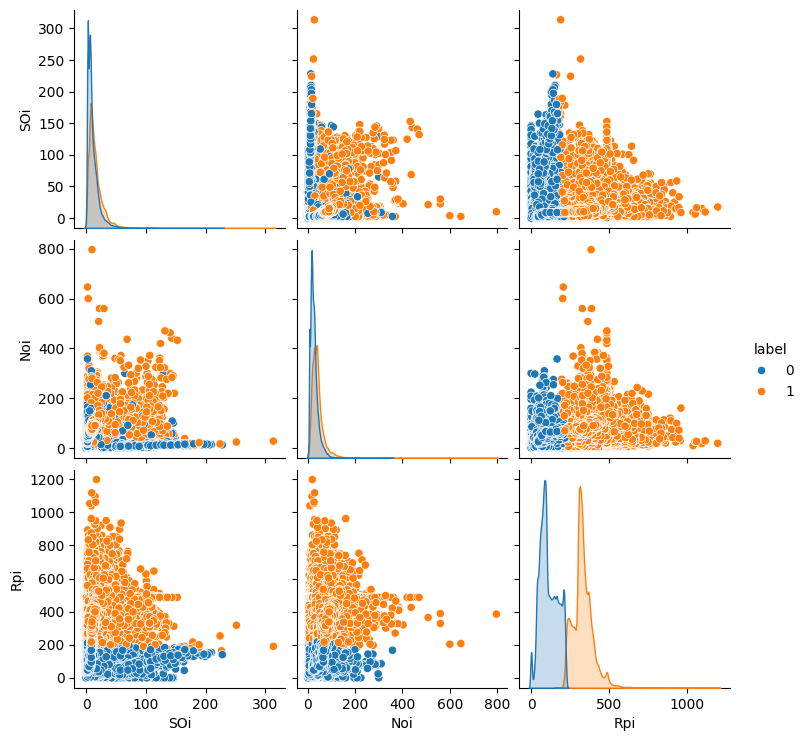

In [ ]:
cols = df.columns[:-2]
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='label')

In [ ]:
 # Group by 'Cluster' and count unique values in 'state'
cluster_count = df.groupby('label')['state'].value_counts()

print("Count of 'state' by Cluster:")
print(cluster_count)

Count of 'state' by Cluster:
label  state            
0      Maharashtra          31902
       Kerala               21594
       Tamil Nadu           16894
       Andhra Pradesh       15833
       Himachal Pradesh     13912
                            ...  
1      Uttaranchal            208
       Mizoram                177
       Puducherry              41
       Arunachal Pradesh       19
       Manipur                 16
Name: count, Length: 67, dtype: int64


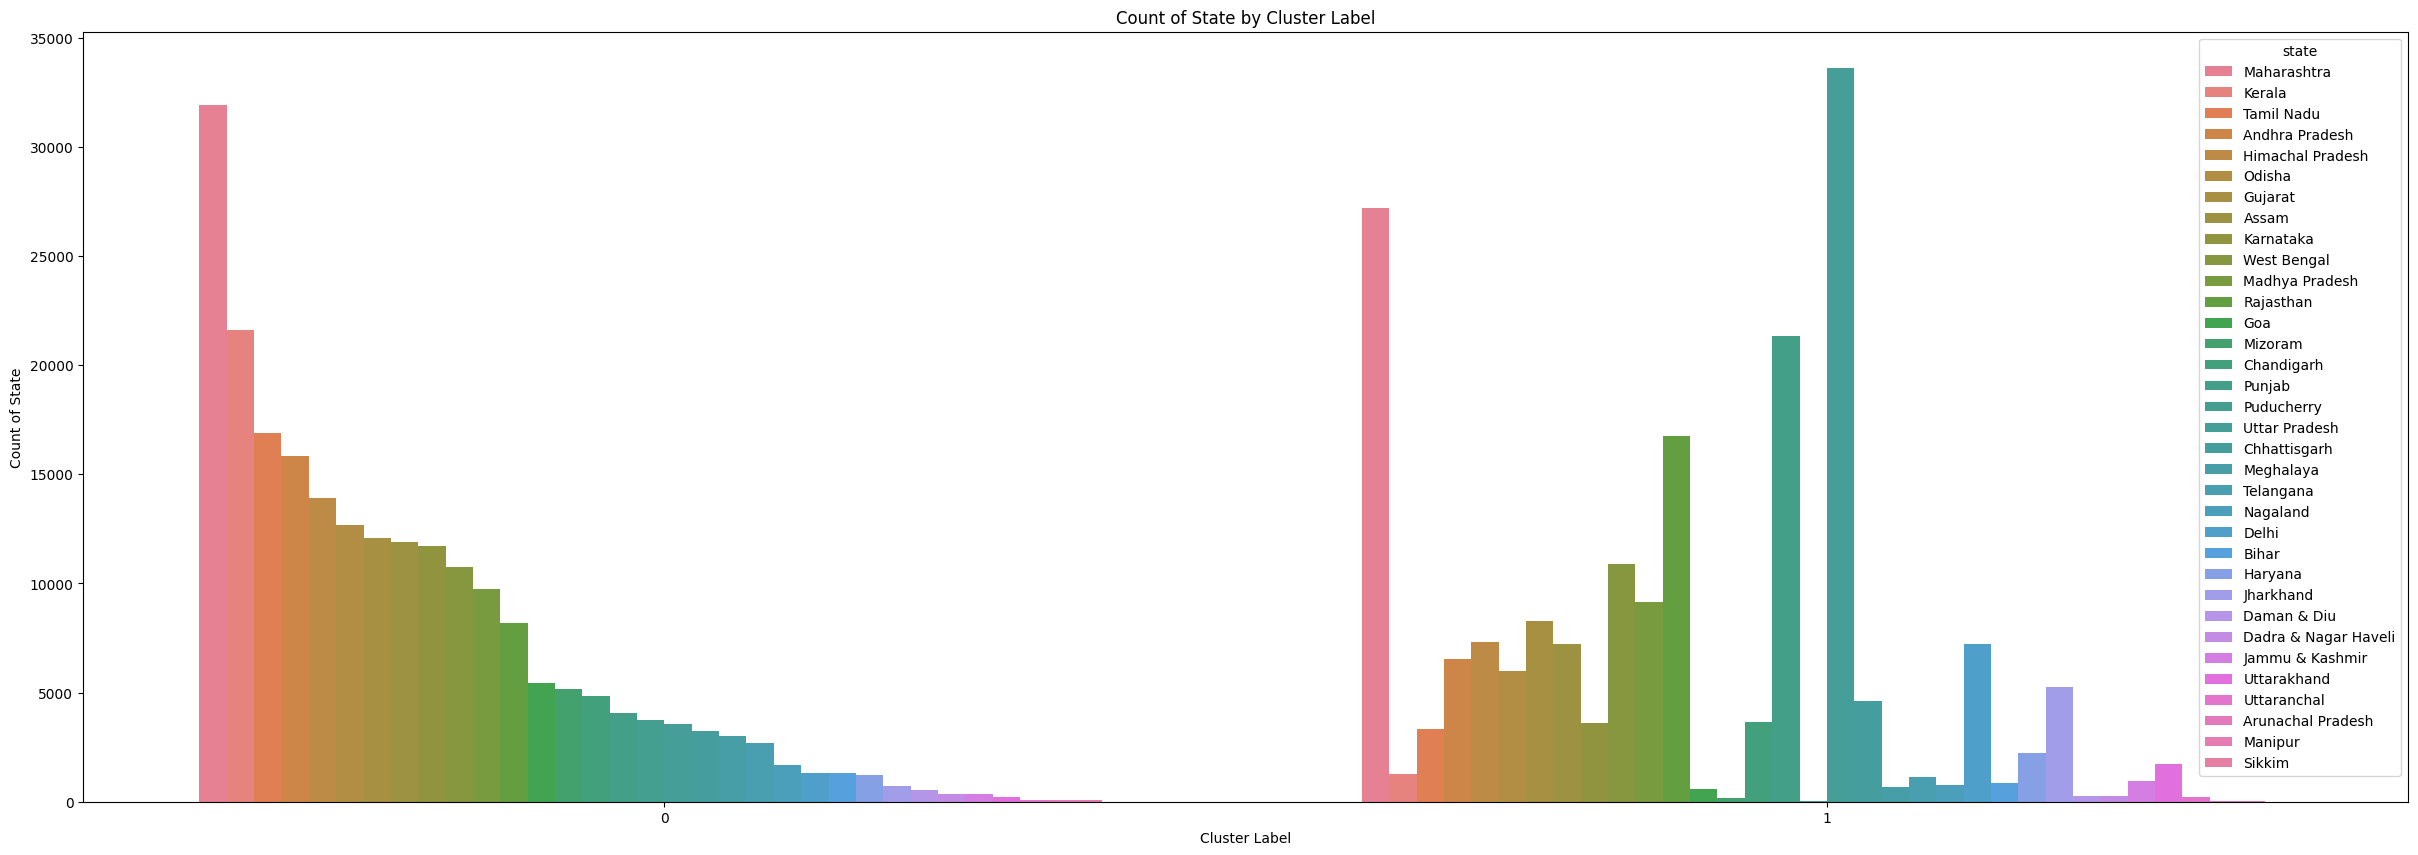

In [ ]:
# Group by 'label' and count the occurrences of 'state'
cluster_count = df.groupby('label')['state'].value_counts().reset_index(name='count')

# Create a bar plot
plt.figure(figsize=(30, 10))  # Adjust the size for clarity
sns.barplot(x='label', y='count', hue='state', data=cluster_count)
plt.xlabel('Cluster Label')
plt.ylabel('Count of State')
plt.title('Count of State by Cluster Label')
plt.show()


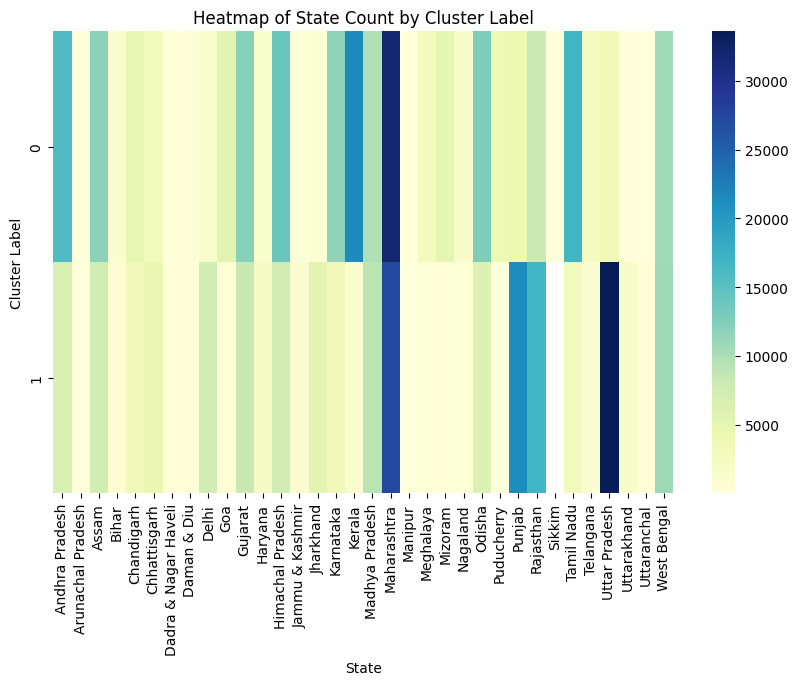

In [ ]:
# Create a pivot table for the heatmap
pivot_data = cluster_count.pivot(index='label', columns='state', values='count')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=False, cmap='YlGnBu')  # Annotate with counts
plt.xlabel('State')
plt.ylabel('Cluster Label')
plt.title('Heatmap of State Count by Cluster Label')
plt.show()

In [ ]:
count_kerala = (df['state'] == 'Kerala').sum()  # Counts occurrences of 'Kerala'
count_tamil = (df['state'] == 'Tamil Nadu').sum()


print("Count of 'Kerala':", count_kerala)
print("Count of 'Tamil Nadu':", count_tamil)



Count of 'Kerala': 22875
Count of 'Tamil Nadu': 20243


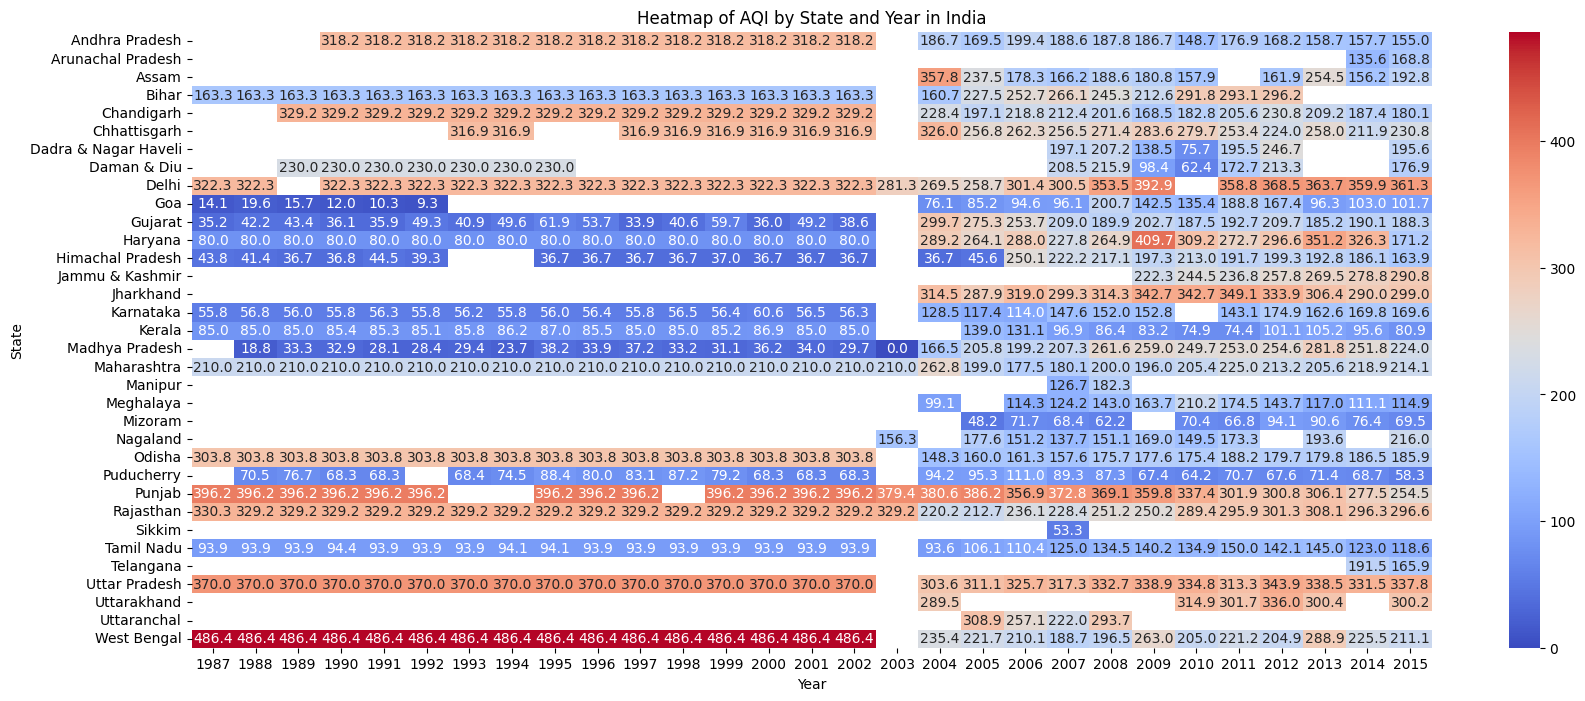

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data_agg = airq_m.groupby(['state', 'year']).agg({'AQI': 'mean'}).reset_index()
# Pivoting the data for heatmap visualization
pivot_data = data_agg.pivot(index='state', columns='year', values='AQI')
# Creating the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', fmt=".1f")  # Format adjusted for decimal places
plt.title('Heatmap of AQI by State and Year in India')
plt.ylabel('State')
plt.xlabel('Year')
plt.show()



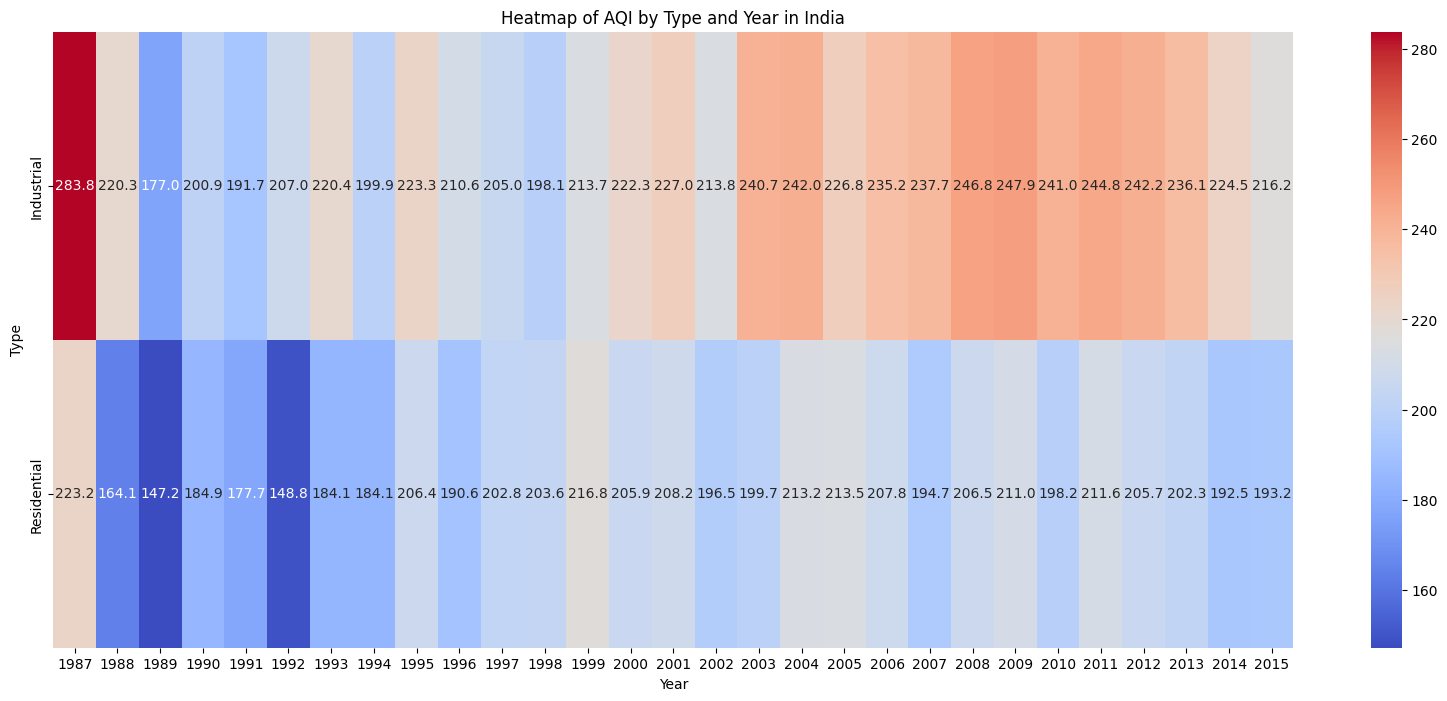

In [ ]:
data_agg2 = airq_m.groupby(['type', 'year']).agg({'AQI': 'mean'}).reset_index()
# Pivoting the data for heatmap visualization
pivot_data = data_agg2.pivot(index='type', columns='year', values='AQI')
# Creating the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', fmt=".1f")  # Format adjusted for decimal places
plt.title('Heatmap of AQI by Type and Year in India')
plt.ylabel('Type')
plt.xlabel('Year')
plt.show()

Predicting values by state of future AQI

In [ ]:

features = ['SOi', 'Noi', 'Rpi', 'state', 'year','AQI']
target = 'AQI'
pred = airq_m[features].copy()

pred = pd.get_dummies(pred, columns=['state'], prefix='state')  # Prefix to identify the state columns

# Standardize the numerical features
scaler = StandardScaler()
numerical_features = ['SOi', 'Noi', 'Rpi', 'year']  # The features to standardize
pred[numerical_features] = scaler.fit_transform(pred[numerical_features])


# Selecting relevant columns for modeling
# The original 'state' column is now replaced with one-hot encoded columns.
# We need to redefine features to include these new columns.
# You can get the list of one-hot encoded 'state' columns.
state_columns = [col for col in pred.columns if col.startswith('state_')]

# Redefine features to include the correct column names
features = ['SOi', 'Noi', 'Rpi', 'year'] + state_columns

# Now 'target' should refer to the original 'AQI' column
target = 'AQI'  # The target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    pred[features], pred[target], test_size=0.2, random_state=42
)



In [ ]:
# Select and train a model (e.g., Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R-squared:", r2)

MSE: 2.7960007282483312
R-squared: 0.9998179752769996


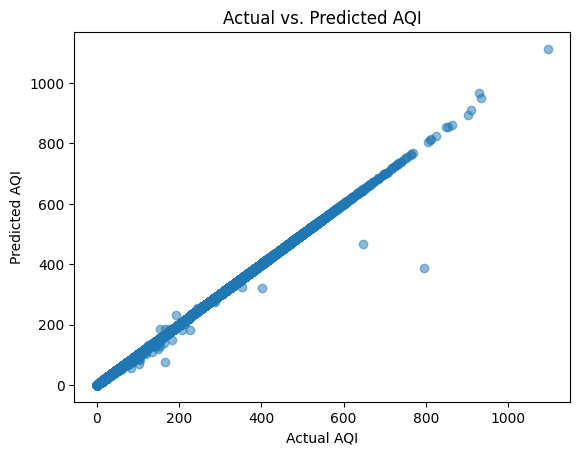

In [ ]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs. Predicted AQI")
plt.show()


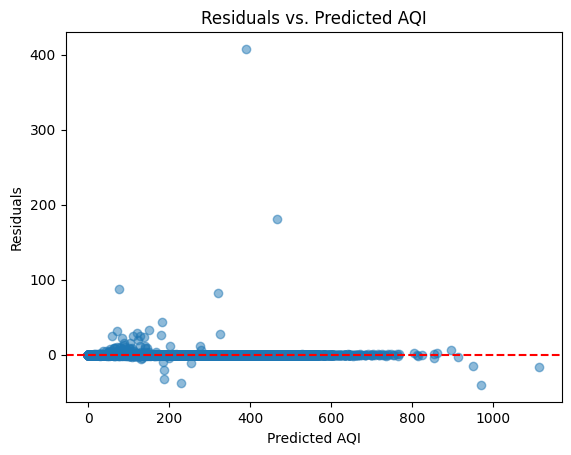

In [ ]:
# Calculate the residuals (difference between actual and predicted)
residuals = y_test - y_pred

# Plot the residuals to identify patterns or trends
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted AQI")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted AQI")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the model
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert to positive values and calculate the mean
mean_mse = -cross_val_scores.mean()

print("Mean MSE from Cross-Validation:", mean_mse)


Mean MSE from Cross-Validation: 1.35019912265623


In [ ]:
# Calculate the standard deviation of the residuals
residual_std = residuals.std()

# Set a threshold for outliers (e.g., 3 standard deviations from the mean)
threshold = 3 * residual_std

# Identify the outliers
outlier_indices = residuals[abs(residuals) > threshold].index

# Extract the outlier data points
outlier_data = X_test.loc[outlier_indices]


In [ ]:
# Analyze common characteristics among outliers
print("Outlier Indices:", outlier_indices)

# Summary statistics for outlier data
print("Summary of Outliers:")
print(outlier_data.describe())



Outlier Indices: Index([429520,  17063,  16942, 226738, 205096, 429428, 429423, 429505, 429525,
       433458, 429106, 136217, 430951, 433656, 213423, 205125, 202143, 429616,
       429529, 143021, 399101, 205089, 288934, 205127, 148051, 229293, 334296,
       430915, 414496, 429552, 430926, 429545, 429603, 204608, 430619, 336439,
       354432, 334294, 429565, 430923, 430921, 202284,  16464, 220245, 430595,
       340312, 124236, 349207, 155438, 238751, 200517, 429536, 430973, 433188],
      dtype='int64')
Summary of Outliers:
             SOi        Noi        Rpi       year
count  54.000000  54.000000  54.000000  54.000000
mean    5.892434   2.894850  -0.390832   0.086637
std     4.663955   7.003316   1.929294   0.762335
min    -0.873166  -1.322902  -1.535950  -2.527964
25%     1.132301  -0.875500  -1.251803  -0.250731
50%     6.066875  -0.092546  -1.034514   0.291468
75%     8.622443   2.926020  -0.680166   0.508347
max    17.429491  34.208280   7.090809   1.158985


In [ ]:
features = ['SOi', 'Noi', 'Rpi']
airq_m[features].describe()

SOi            Noi            Rpi
count  414033.000000  414033.000000  414033.000000
mean       13.194338      32.068530     213.110529
std        12.247781      22.351286     124.642136
min         0.000000       0.000000       0.000000
25%         6.000000      17.500000      93.333333
50%        10.000000      27.375000     206.666667
75%        16.625000      40.125000     320.000000
max       313.625000     796.666667    1198.461538

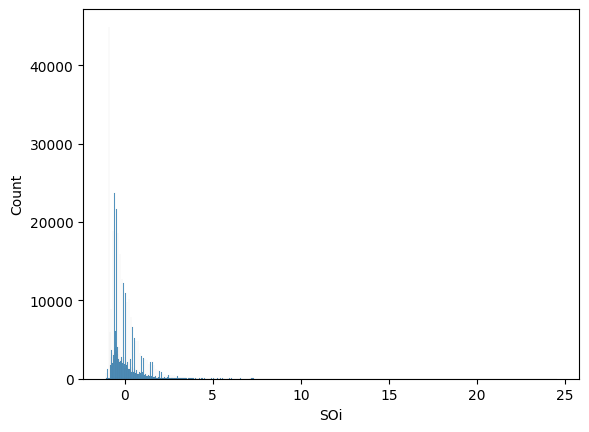

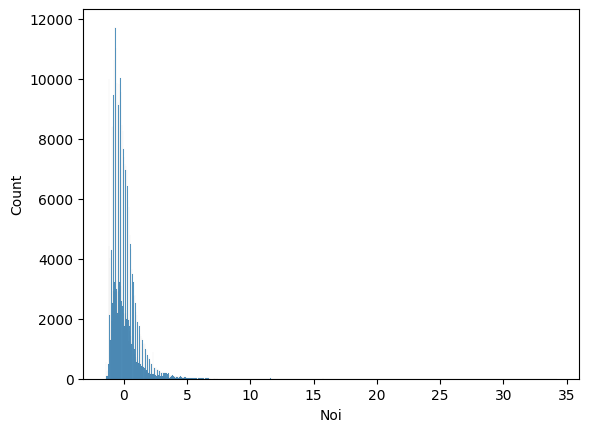

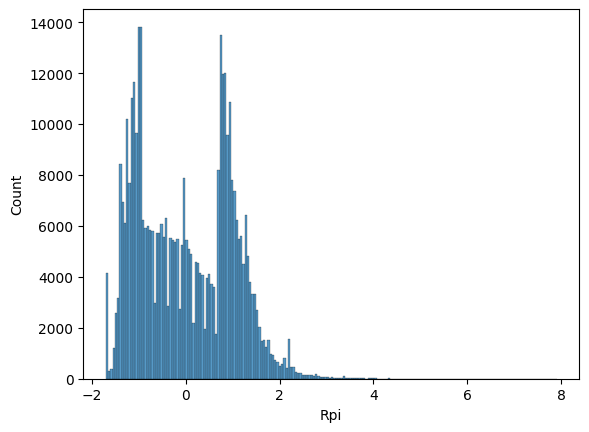

In [ ]:
# Check the distribution of key features in the training data
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of 'SOi'
sns.histplot(pred['SOi'])
plt.show()

# Visualize the distribution of 'Noi'
sns.histplot(pred['Noi'])
plt.show()

# Visualize the distribution of 'Rpi'
sns.histplot(pred['Rpi'])
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import itertools

# Calculate summary statistics for 'SOi', 'Noi', 'Rpi'
soi_summary = airq_m['SOi'].describe()  # Summary for 'SOi'
noi_summary = airq_m['Noi'].describe()  # Summary for 'Noi'
rpi_summary = airq_m['Rpi'].describe()  # Summary for 'Rpi'

# Extract the minimum and maximum values from the summary statistics
soi_min, soi_max = soi_summary['min'], soi_summary['max']
noi_min, noi_max = noi_summary['min'], noi_summary['max']
rpi_min, rpi_max = rpi_summary['min'], rpi_summary['max']

# Define the states and year range
states = ["Maharashtra", "Uttar Pradesh", "Andhra Pradesh", "Punjab", "Rajasthan", "Kerala",
          "Himachal Pradesh", "West Bengal", "Gujarat", "Tamil Nadu", "Madhya Pradesh", "Assam",
          "Odisha", "Karnataka", "Delhi", "Chandigarh", "Chhattisgarh", "Goa", "Jharkhand",
          "Mizoram", "Telangana", "Meghalaya", "Puducherry", "Haryana", "Nagaland", "Bihar",
          "Uttarakhand", "Jammu & Kashmir", "Daman & Diu", "Dadra & Nagar Haveli", "Uttaranchal",
          "Arunachal Pradesh", "Manipur", "Sikkim"]

years = list(range(2016, 2025))

# Create a DataFrame with all state-year combinations
future_data = pd.DataFrame(list(itertools.product(states, years)), columns=["state", "year"])

# Generate random values within derived ranges
np.random.seed(42)  # For reproducibility
future_data["SOi"] = np.random.uniform(soi_min, soi_max, len(future_data))
future_data["Noi"] = np.random.uniform(noi_min, noi_max, len(future_data))
future_data["Rpi"] = np.random.uniform(rpi_min, rpi_max, len(future_data))

# Apply one-hot encoding to 'state' and scaling to numerical features
future_data_encoded = pd.get_dummies(future_data, columns=["state"])

# Standardize the numerical features
scaler = StandardScaler()
numerical_features = ['SOi', 'Noi', 'Rpi', 'year']
future_data_encoded[numerical_features] = scaler.fit_transform(future_data_encoded[numerical_features])


In [ ]:
# Define the correct features from the training data
training_feature_names = ['SOi', 'Noi', 'Rpi', 'year'] + [col for col in pred.columns if col.startswith('state_')]

# Reorder the future data to match the correct features
future_data_encoded = future_data_encoded[training_feature_names]


In [ ]:
# Make predictions with the corrected future data
future_aqi_predictions = model.predict(future_data_encoded)

# Add the predictions to the future data
future_data["Predicted_AQI"] = future_aqi_predictions

# Display the predicted AQI values in the future data
print(future_data.sample(20))


                    state  year         SOi         Noi          Rpi  \
30                 Punjab  2019  190.541254  681.516932   253.412304   
225                 Bihar  2016   76.521252  796.441746   434.315150   
173               Mizoram  2018   71.034737  416.734616  1088.743057   
0             Maharashtra  2016  117.465145  411.319277   752.514467   
158                   Goa  2021   74.529075  766.530797   132.587882   
76                Gujarat  2020  241.889662  501.057801   922.207685   
265  Dadra & Nagar Haveli  2020  232.323558  624.310233   789.695001   
260           Daman & Diu  2024  192.881641  312.487756   771.808683   
305                Sikkim  2024  306.051608  636.863618  1136.684809   
139            Chandigarh  2020  304.775156  754.641367  1126.352653   
183             Telangana  2019  275.155555  709.243481  1045.206962   
109                Odisha  2017   24.142824  357.261599   217.200859   
250       Jammu & Kashmir  2023   92.346534  106.765465   628.46

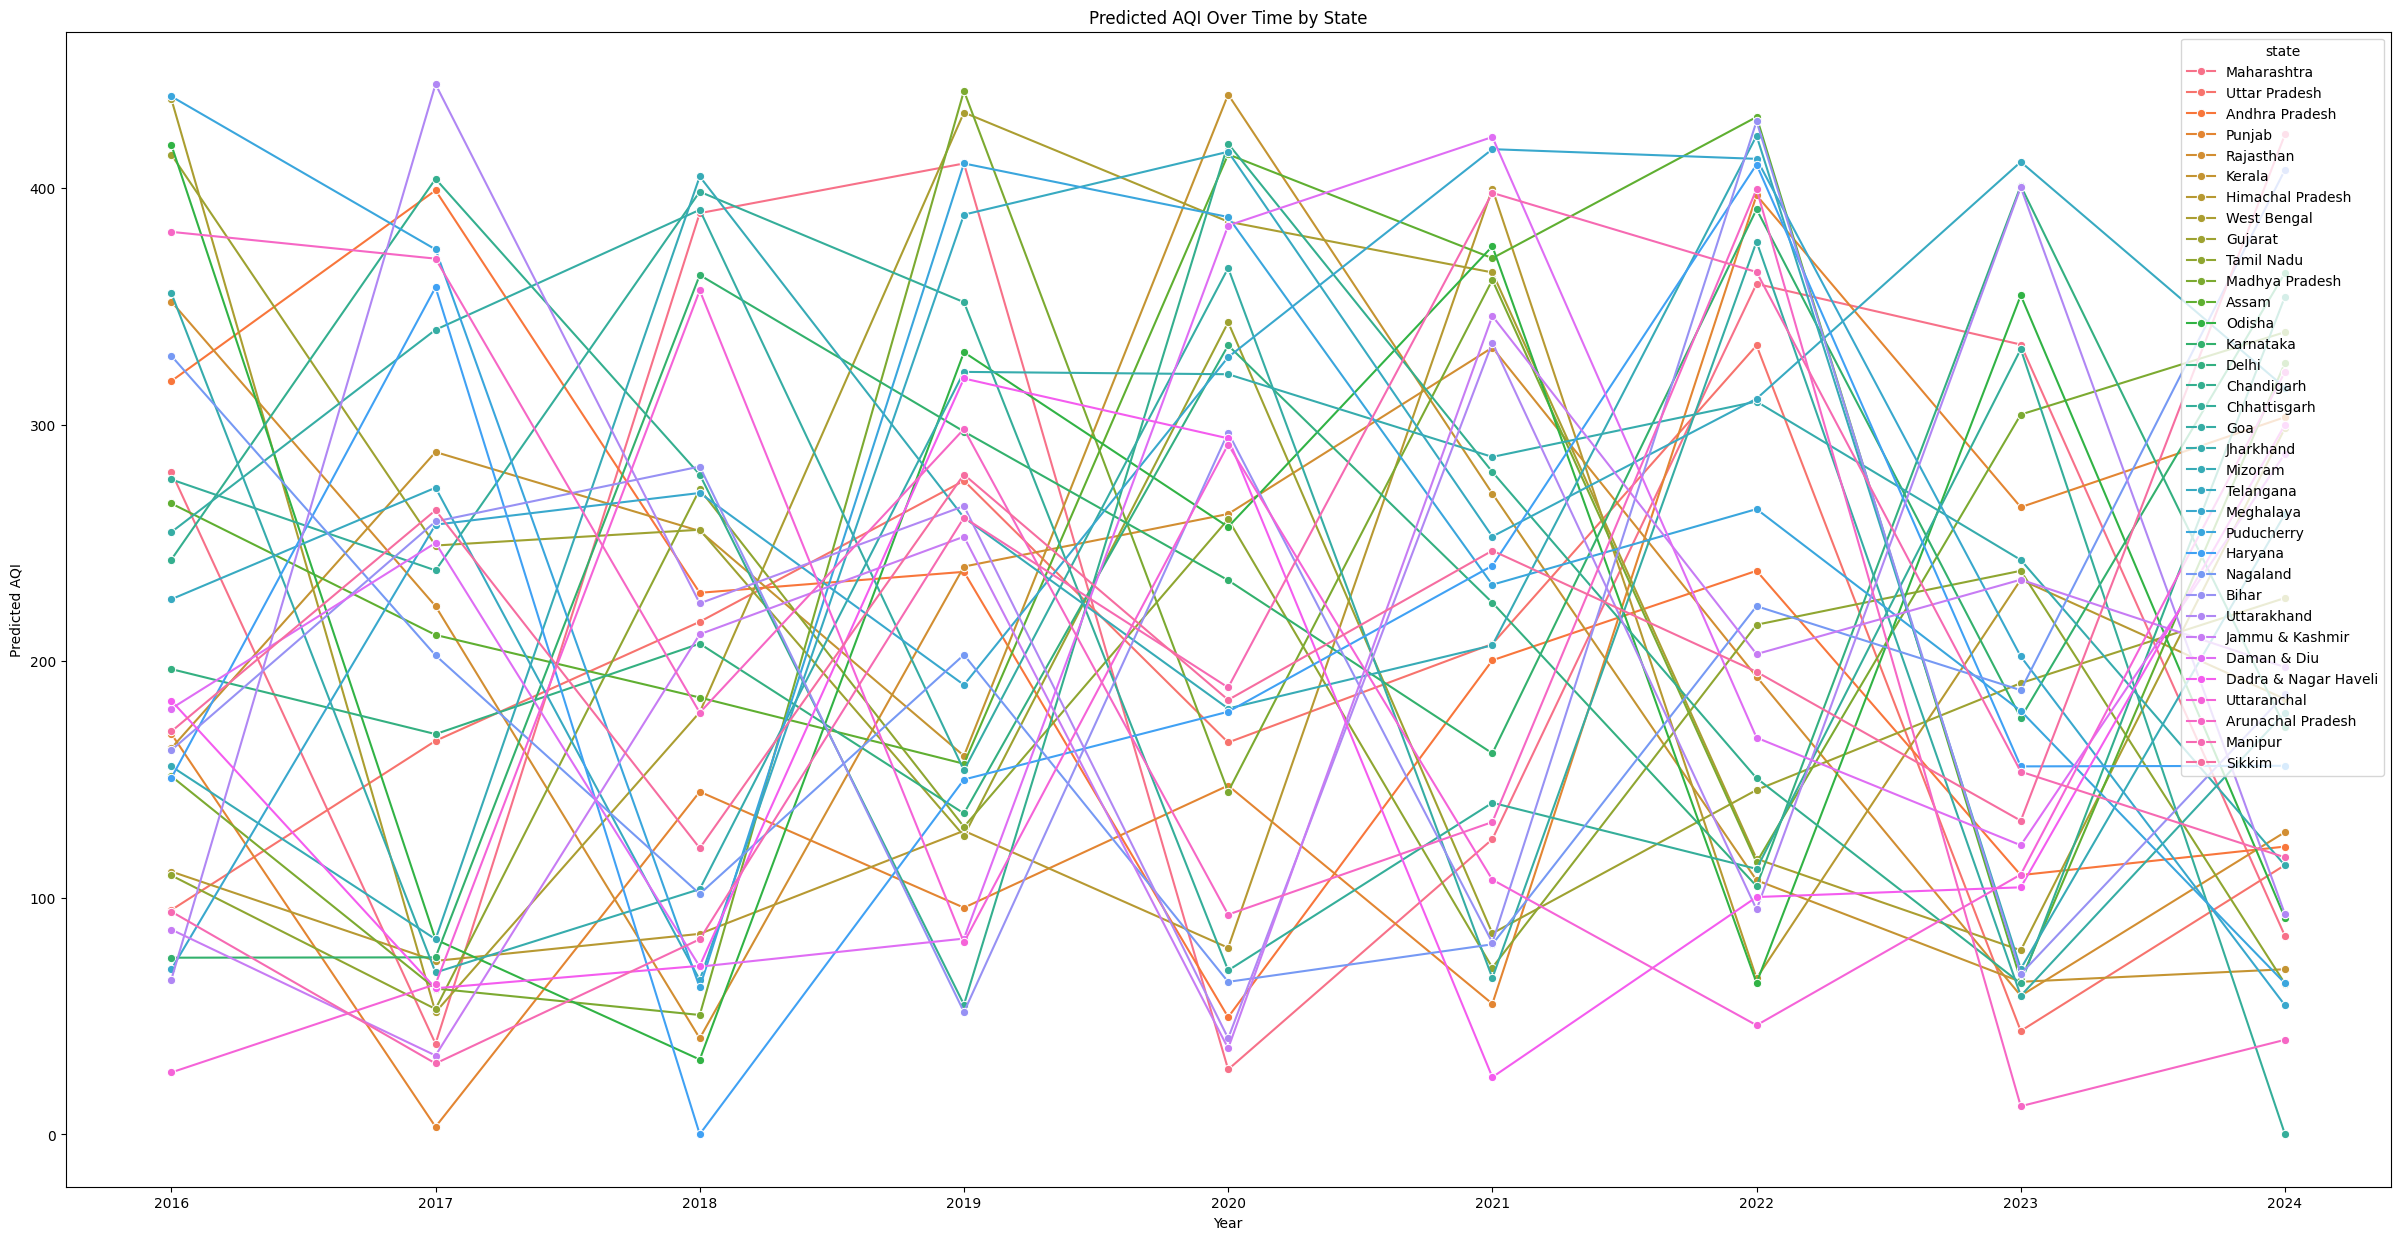

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot to show predicted AQI over time for each state
plt.figure(figsize=(30, 15))
sns.lineplot(data=future_data, x='year', y='Predicted_AQI', hue='state', marker='o', legend='full')
plt.title('Predicted AQI Over Time by State')
plt.xlabel('Year')
plt.ylabel('Predicted AQI')
plt.show()


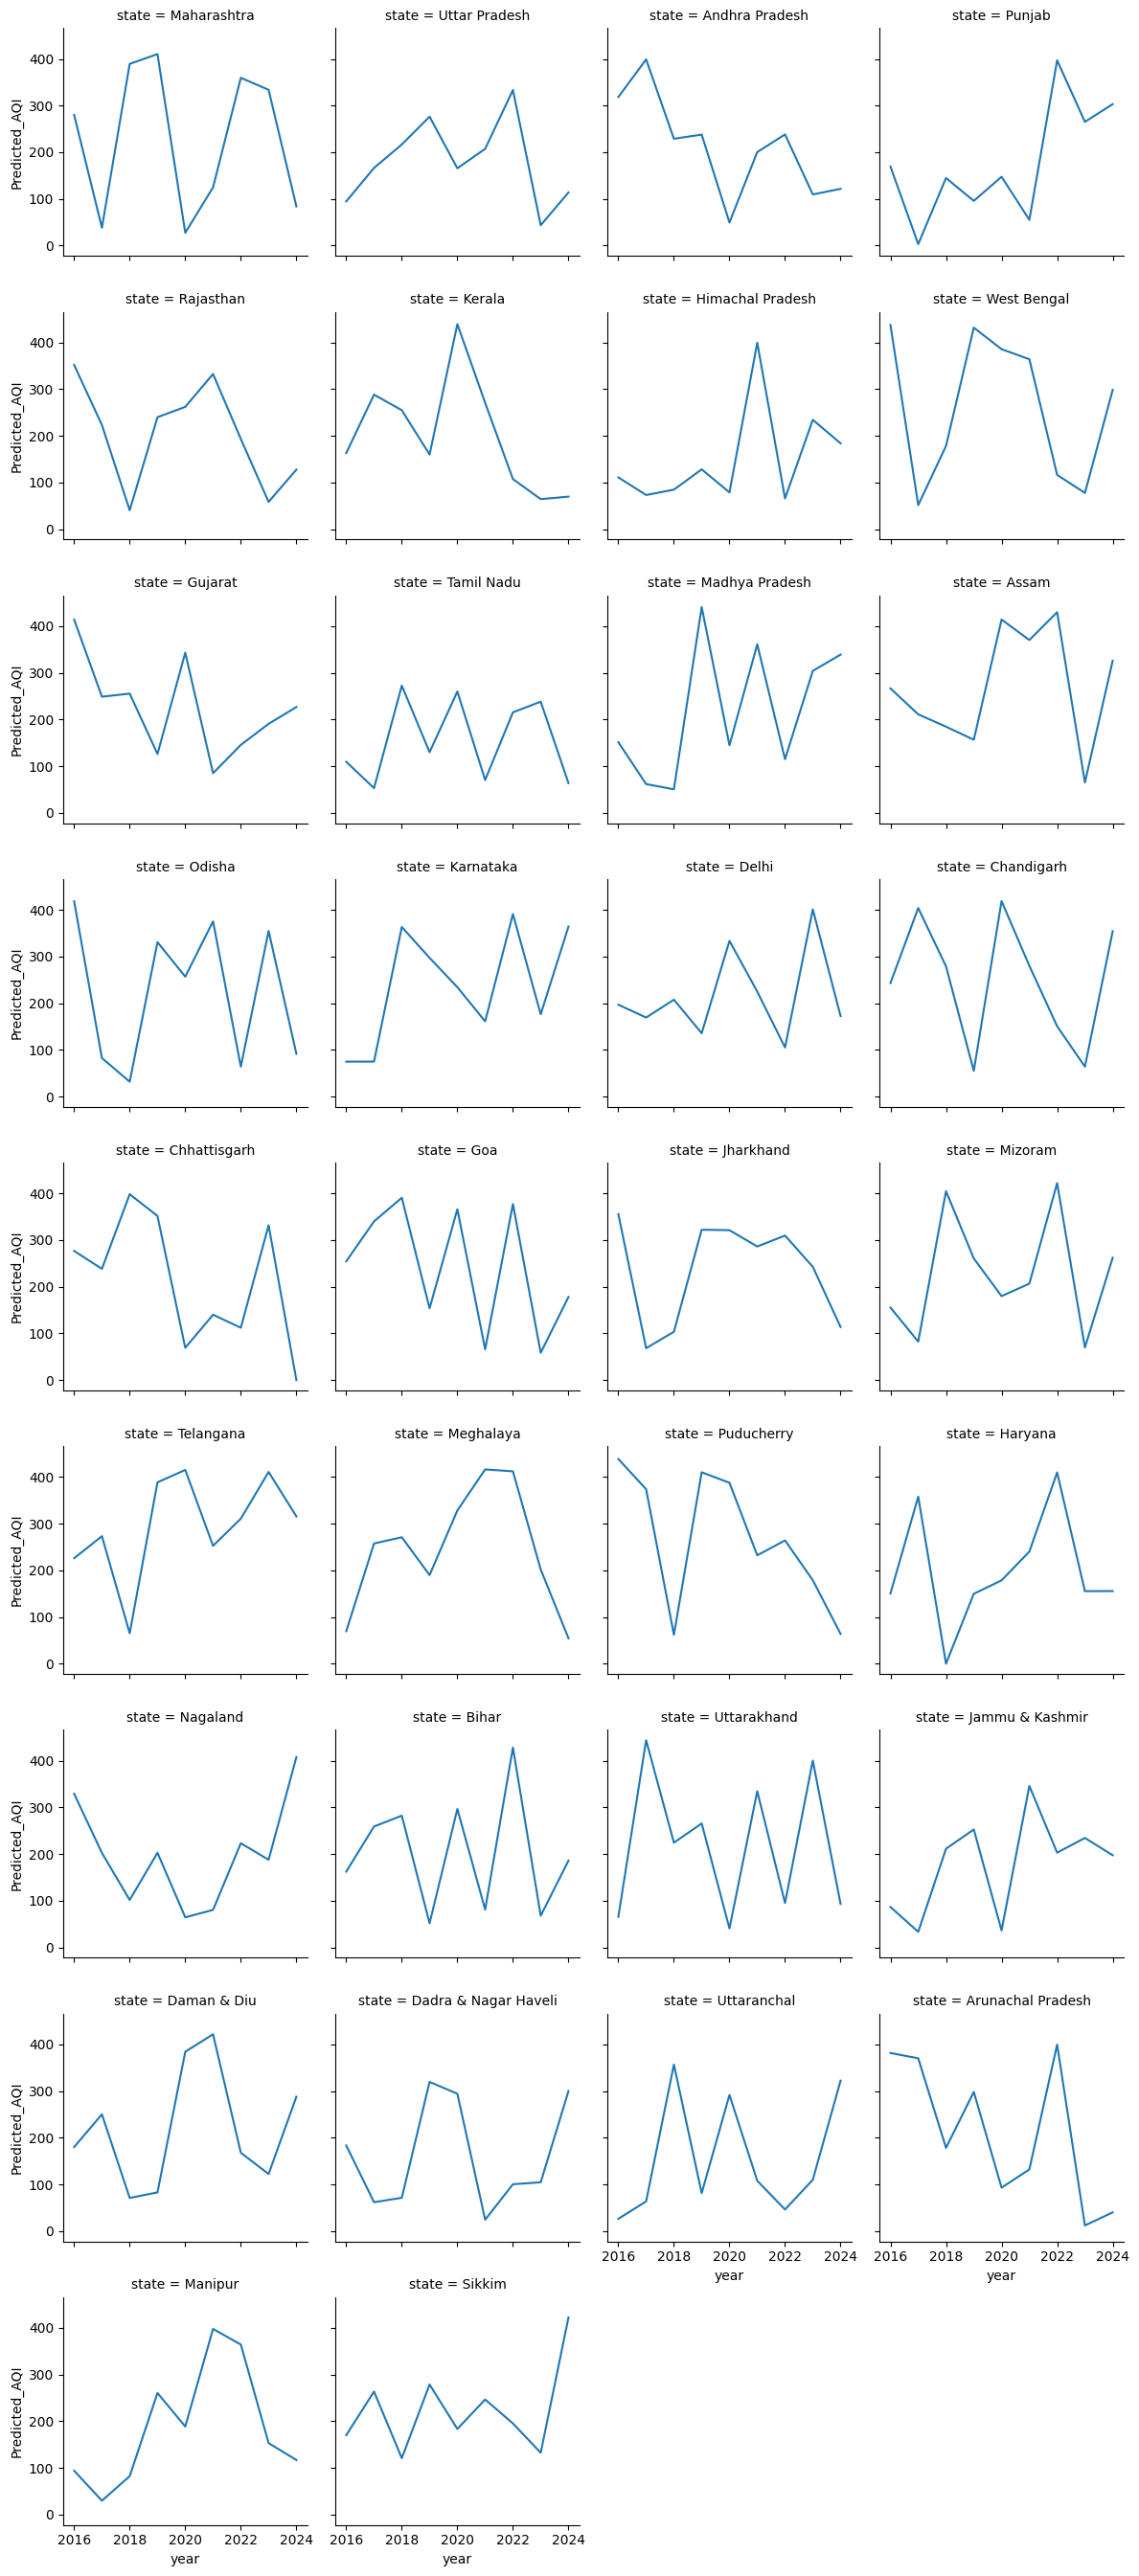

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Facet plot to show predicted AQI over time for each state in separate plots
g = sns.FacetGrid(future_data, col='state', col_wrap=4, height=3)
g.map(sns.lineplot, 'year', 'Predicted_AQI')
plt.show()


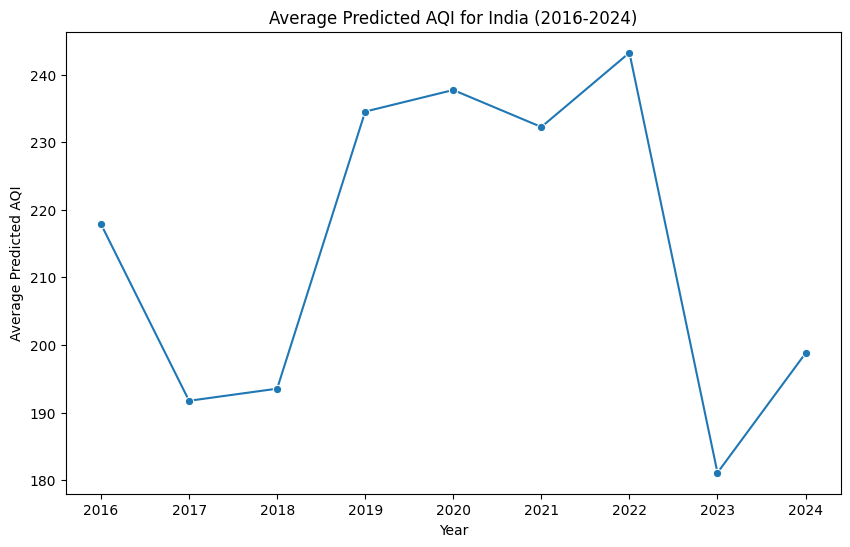

In [ ]:
average_aqi_per_year = future_data.groupby("year")["Predicted_AQI"].mean().reset_index()

# Create a line plot for the average predicted AQI over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_aqi_per_year, x='year', y='Predicted_AQI', marker='o')
plt.title('Average Predicted AQI for India (2016-2024)')
plt.xlabel('Year')
plt.ylabel('Average Predicted AQI')
plt.show()

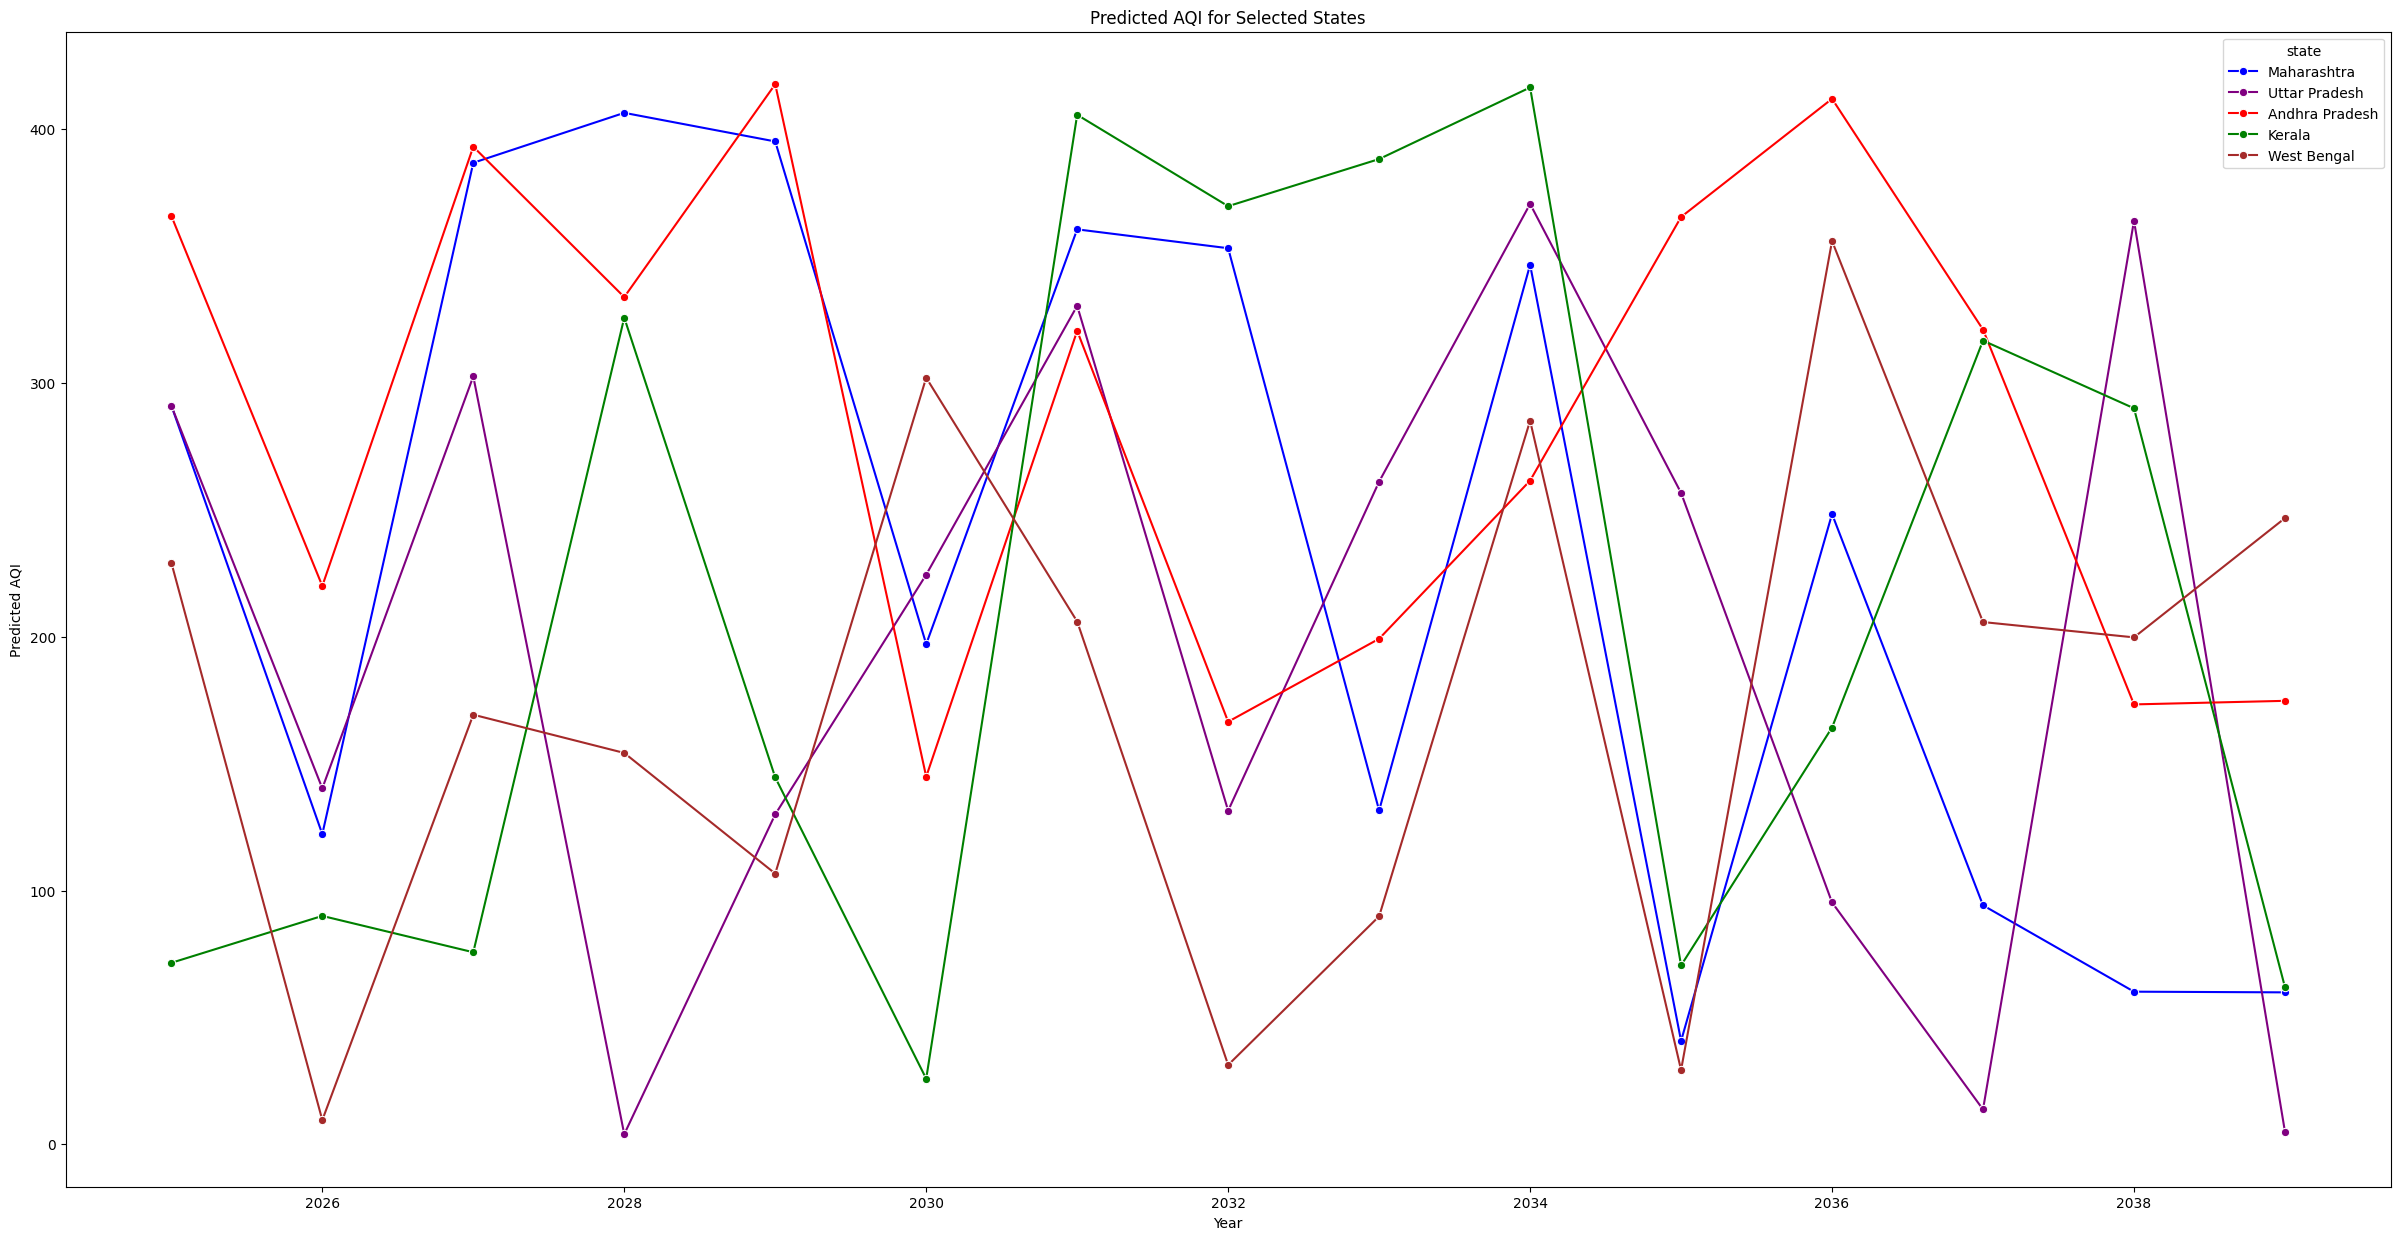

In [ ]:
# Select a subset of states to focus on
selected_states = ['Andhra Pradesh', 'Kerala', 'Maharashtra', 'West Bengal', 'Uttar Pradesh']  # Example subset

simplified_data = future_data[future_data['state'].isin(selected_states)]

custom_palette = {
    'Andhra Pradesh': 'red',
    'Kerala': 'green',
    'Maharashtra': 'blue',
    'West Bengal': 'brown',
    'Uttar Pradesh': 'purple'
}

# Line plot with fewer states to reduce chaos
plt.figure(figsize=(30, 15))
sns.lineplot(data=simplified_data, x='year', y='Predicted_AQI', hue='state', palette=custom_palette, marker='o')
plt.title('Predicted AQI for Selected States')
plt.xlabel('Year')
plt.ylabel('Predicted AQI')
plt.show()


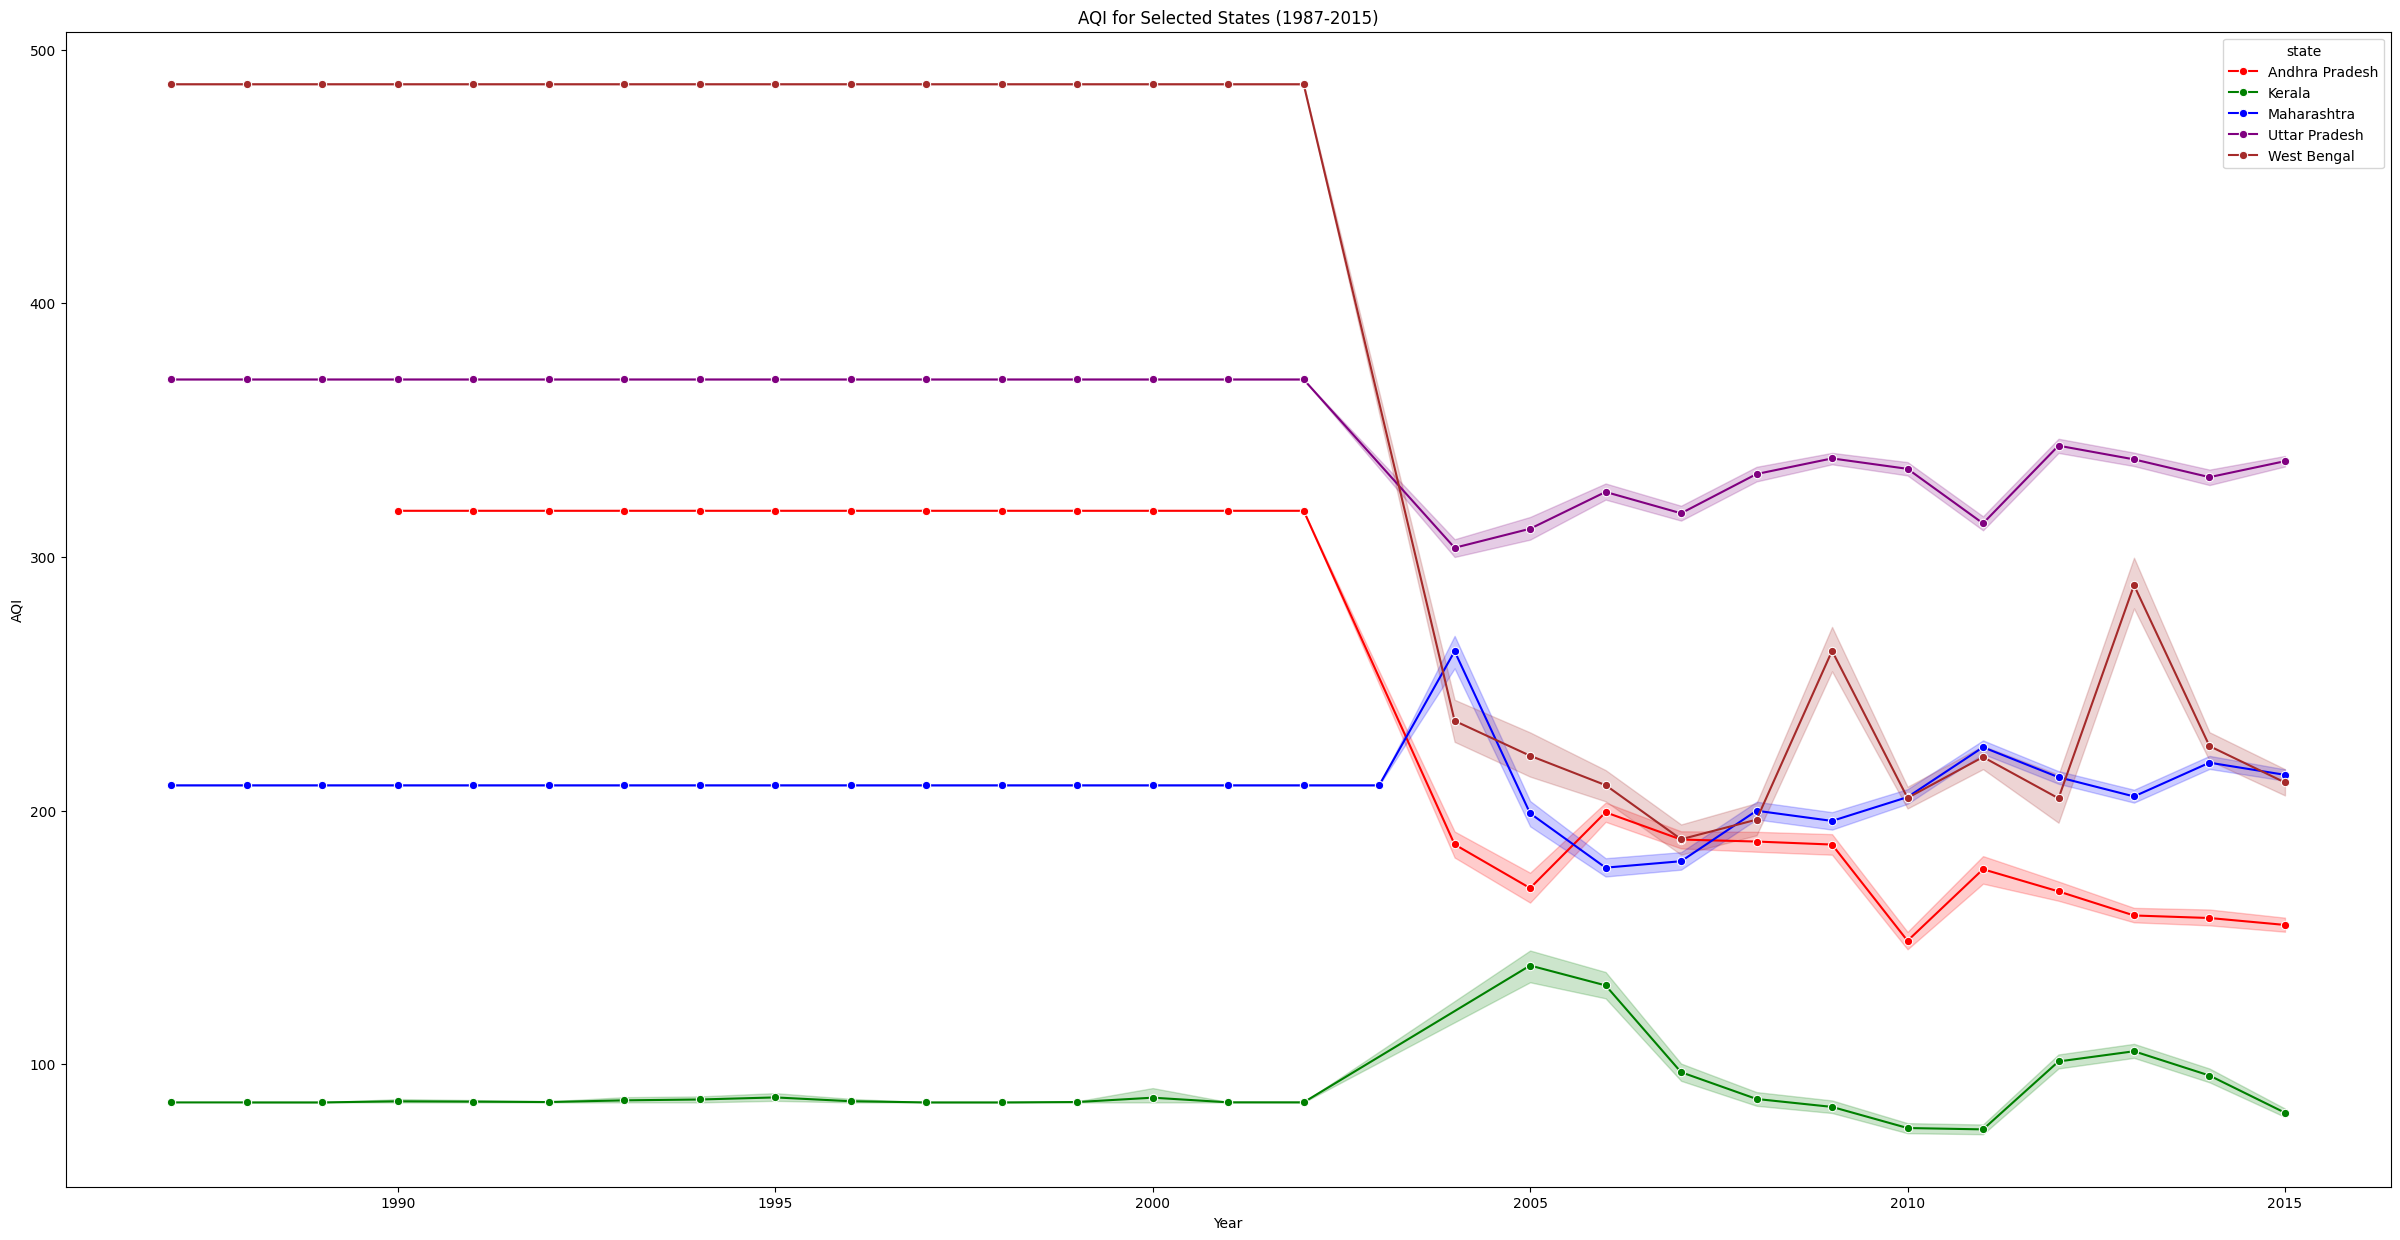

In [ ]:
import pandas as pd

# Define the desired states and year range
selected_states = ['Andhra Pradesh', 'Kerala', 'Maharashtra','West Bengal', 'Uttar Pradesh']
year_range = (1987, 2015)

# Filter the data for the selected states and year range
filtered_data = airq_m[airq_m['state'].isin(selected_states)]

# Filter for the desired year range
filtered_data = filtered_data[
    (filtered_data['year'] >= year_range[0]) & (filtered_data['year'] <= year_range[1])
]

# Select the relevant columns for plotting
plot_data = filtered_data[['state', 'year', 'AQI']]

import seaborn as sns
import matplotlib.pyplot as plt

# Create a line plot for AQI over time for the selected states
plt.figure(figsize=(30, 15))
sns.lineplot(data=plot_data, x='year', y='AQI', hue='state', palette=custom_palette, marker='o')
plt.title('AQI for Selected States (1987-2015)')
plt.xlabel('Year')
plt.ylabel('AQI')
plt.show()


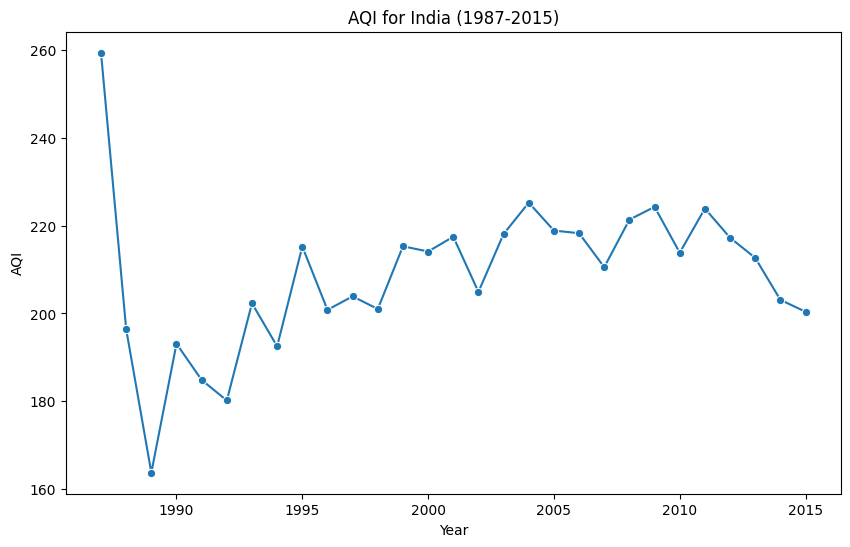

In [ ]:
average_aqi_per_year = airq_m.groupby("year")["AQI"].mean().reset_index()

# Create a line plot for the average predicted AQI over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_aqi_per_year, x='year', y='AQI', marker='o')
plt.title('AQI for India (1987-2015)')
plt.xlabel('Year')
plt.ylabel('AQI')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import itertools

# Define the states and year range
states = ["Maharashtra", "Uttar Pradesh", "Andhra Pradesh", "Punjab", "Rajasthan", "Kerala",
          "Himachal Pradesh", "West Bengal", "Gujarat", "Tamil Nadu", "Madhya Pradesh", "Assam",
          "Odisha", "Karnataka", "Delhi", "Chandigarh", "Chhattisgarh", "Goa", "Jharkhand",
          "Mizoram", "Telangana", "Meghalaya", "Puducherry", "Haryana", "Nagaland", "Bihar",
          "Uttarakhand", "Jammu & Kashmir", "Daman & Diu", "Dadra & Nagar Haveli", "Uttaranchal",
          "Arunachal Pradesh", "Manipur", "Sikkim"]

years = list(range(2016, 2025))

# Create a DataFrame with all state-year combinations
future_data = pd.DataFrame(list(itertools.product(states, years)), columns=["state", "year"])

# Add a broader range of values for 'SOi', 'Noi', and 'Rpi'
np.random.seed(42)  # For reproducibility

# Generating random values within a realistic range
future_data["SOi"] = np.random.uniform(5, 25, len(future_data))  # Example range
future_data["Noi"] = np.random.uniform(15, 45, len(future_data))
future_data["Rpi"] = np.random.uniform(90, 350, len(future_data))

# Apply one-hot encoding to 'state' and scaling to numerical features
future_data_encoded = pd.get_dummies(future_data, columns=["state"])

# Standardize the numerical features
scaler = StandardScaler()
numerical_features = ['SOi', 'Noi', 'Rpi', 'year']
future_data_encoded[numerical_features] = scaler.fit_transform(future_data_encoded[numerical_features])

# Define the correct features from the training data
training_feature_names = ['SOi', 'Noi', 'Rpi', 'year'] + [col for col in pred.columns if col.startswith('state_')]

# Reorder the future data to match the correct features
future_data_encoded = future_data_encoded[training_feature_names]



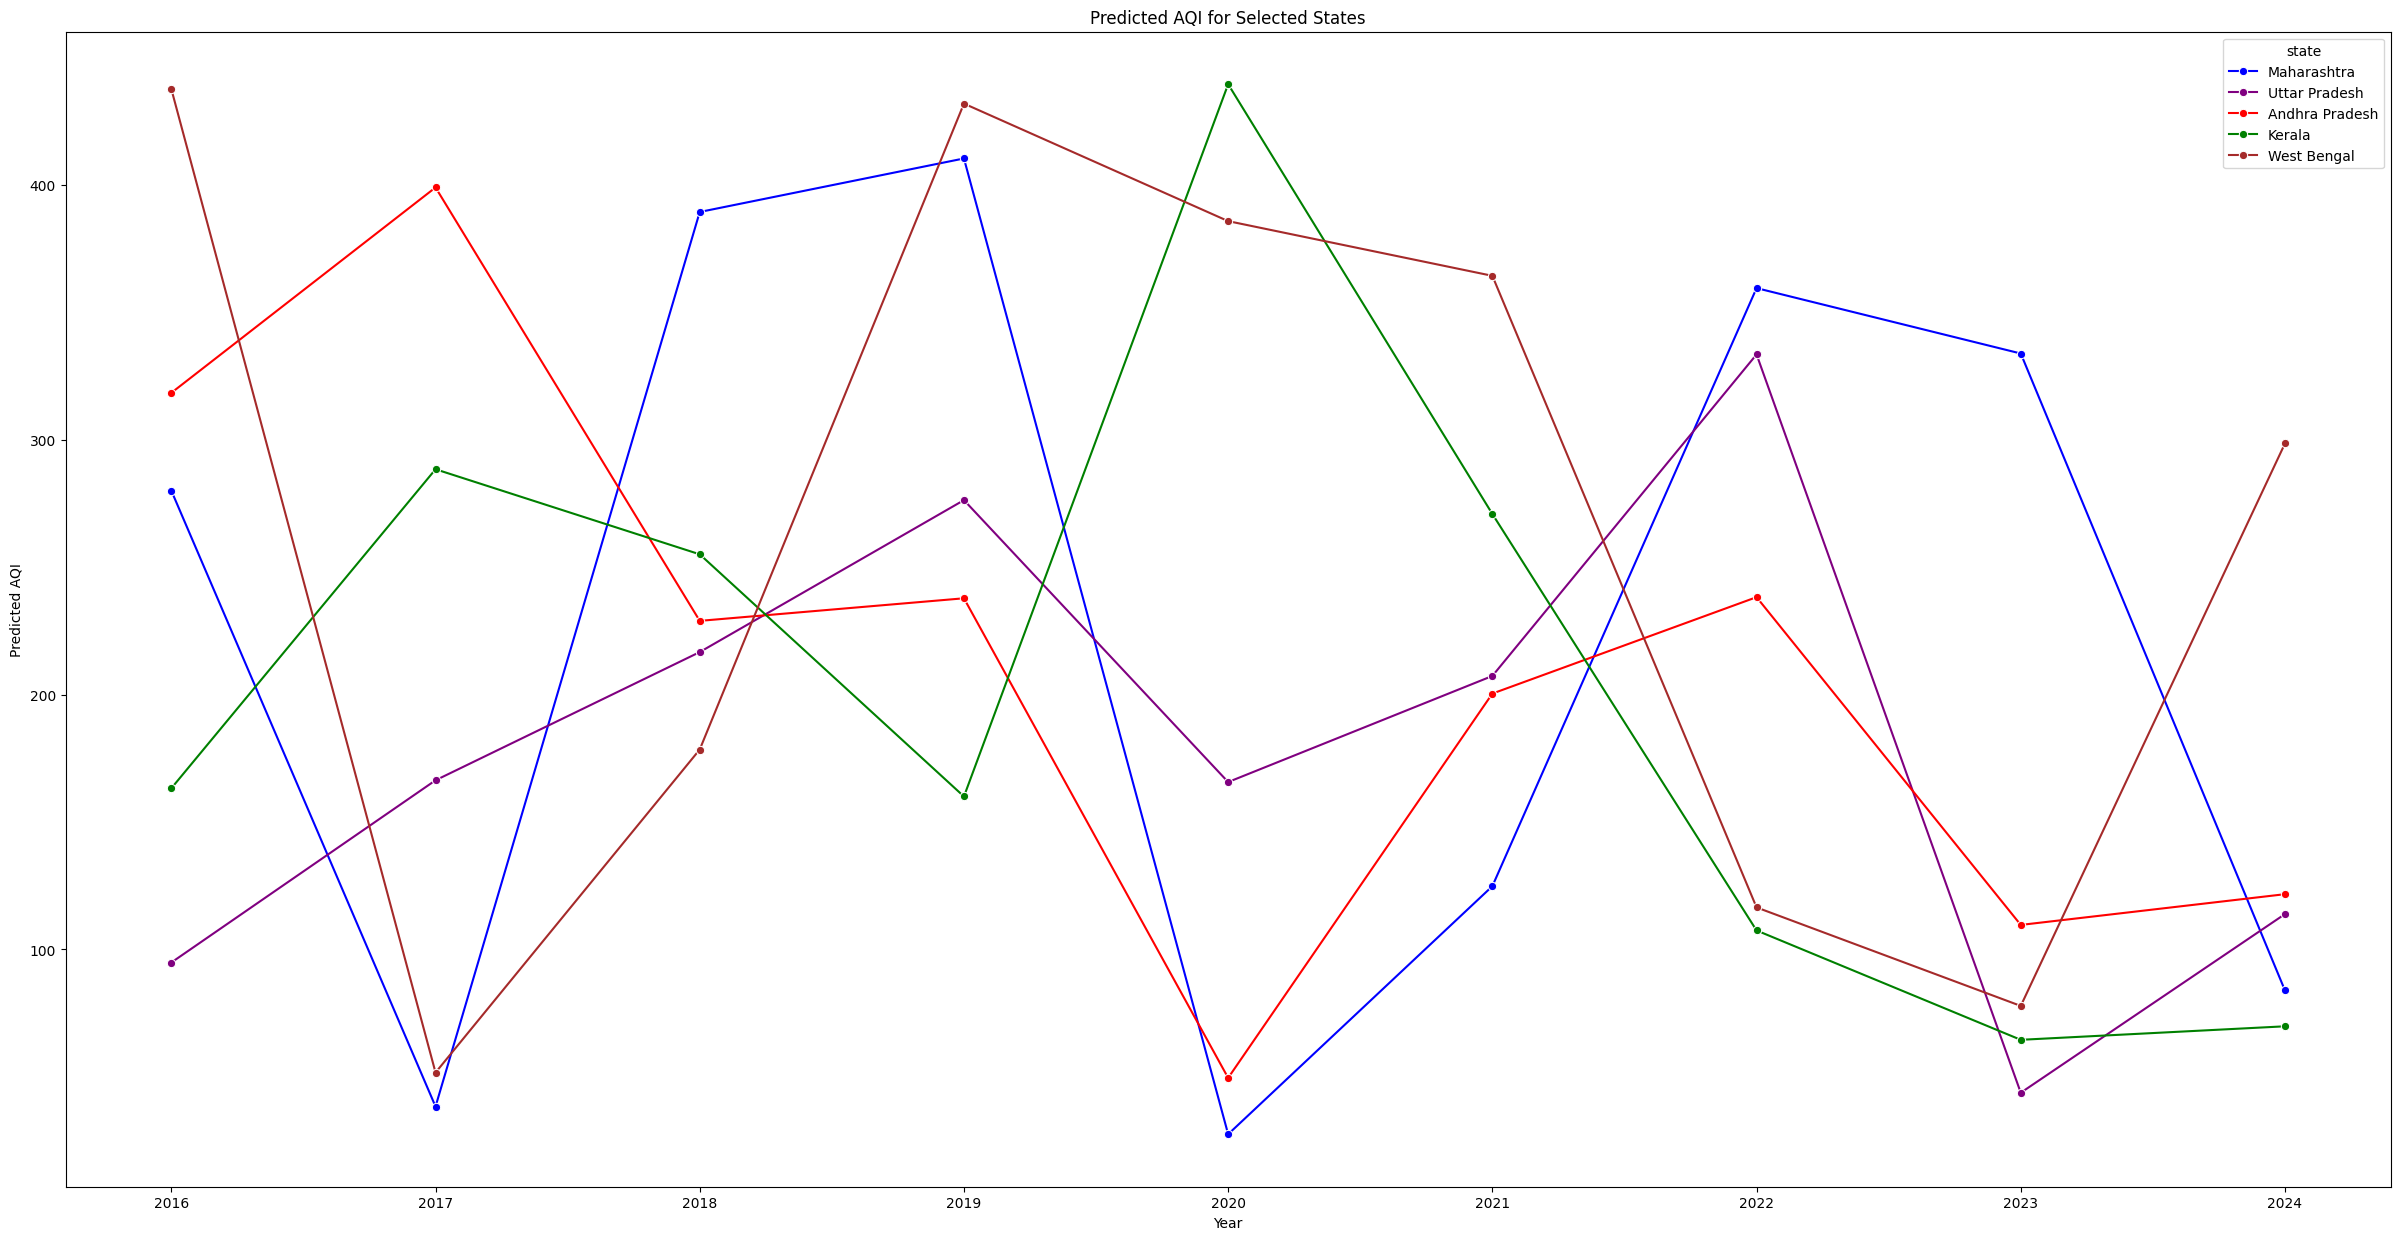

In [ ]:
# Select a subset of states to focus on
selected_states = ['Andhra Pradesh', 'Kerala', 'Maharashtra', 'West Bengal', 'Uttar Pradesh']  # Example subset

simplified_data = future_data[future_data['state'].isin(selected_states)]

custom_palette = {
    'Andhra Pradesh': 'red',
    'Kerala': 'green',
    'Maharashtra': 'blue',
    'West Bengal': 'brown',
    'Uttar Pradesh': 'purple'
}

# Line plot with fewer states to reduce chaos
plt.figure(figsize=(30, 15))
sns.lineplot(data=simplified_data, x='year', y='Predicted_AQI', hue='state', palette=custom_palette, marker='o')
plt.title('Predicted AQI for Selected States')
plt.xlabel('Year')
plt.ylabel('Predicted AQI')
plt.show()

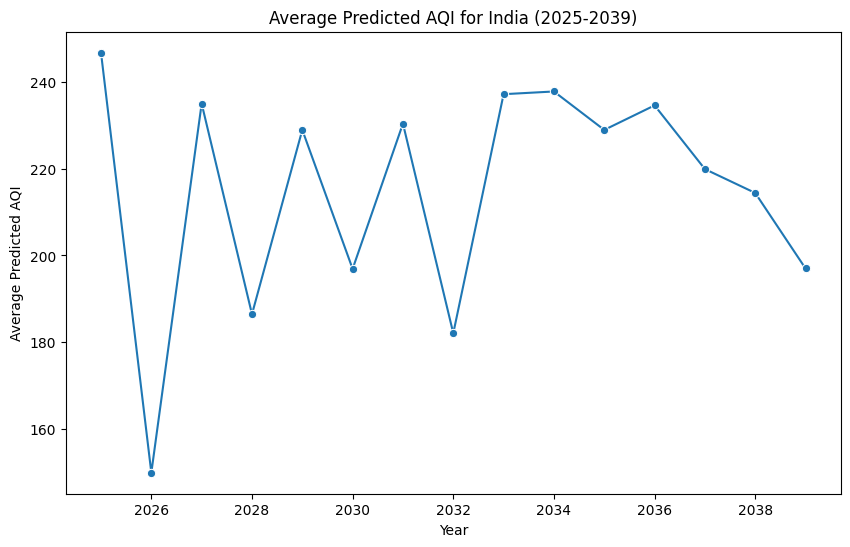

In [ ]:
average_aqi_per_year = future_data.groupby("year")["Predicted_AQI"].mean().reset_index()

# Create a line plot for the average predicted AQI over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_aqi_per_year, x='year', y='Predicted_AQI', marker='o')
plt.title('Average Predicted AQI for India (2025-2039)')
plt.xlabel('Year')
plt.ylabel('Average Predicted AQI')
plt.show()

In [ ]:
# Filter the historical data (1987-2015)
historical_data = airq_m[
    (airq_m['year'] >= 1987) & (airq_m['year'] <= 2015)
]

# Select relevant columns for consistency
historical_data = historical_data[['state', 'year', 'AQI']]


In [ ]:
# Filter the predicted data to get values from 2015-2024
predicted_data = future_data[
    (future_data['year'] >= 2015) & (future_data['year'] <= 2024)
]

# Select relevant columns for consistency with historical data
predicted_data = predicted_data[['state', 'year', 'Predicted_AQI']]

# Rename the 'Predicted_AQI' column to 'AQI' for consistency
predicted_data.rename(columns={'Predicted_AQI': 'AQI'}, inplace=True)


In [ ]:
# Combine historical data and predicted data into a single DataFrame
combined_data = pd.concat([historical_data, predicted_data], ignore_index=True)

# Sort by state and year to ensure the correct order
combined_data.sort_values(by=['state', 'year'], inplace=True)


In [ ]:
# Group by year and calculate the average AQI for each year
average_aqi_per_year = combined_data.groupby('year')['AQI'].mean().reset_index()


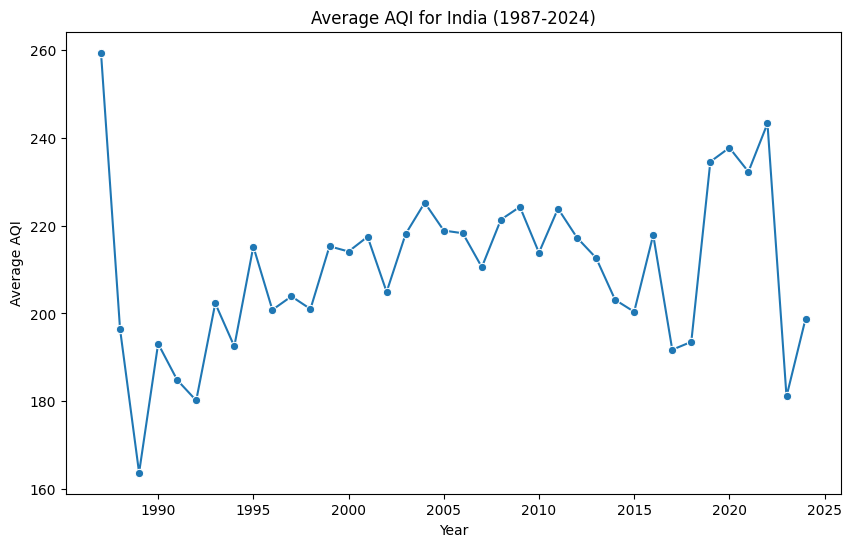

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_aqi_per_year, x='year', y='AQI', marker='o')
plt.title('Average AQI for India (1987-2024)')
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.show()

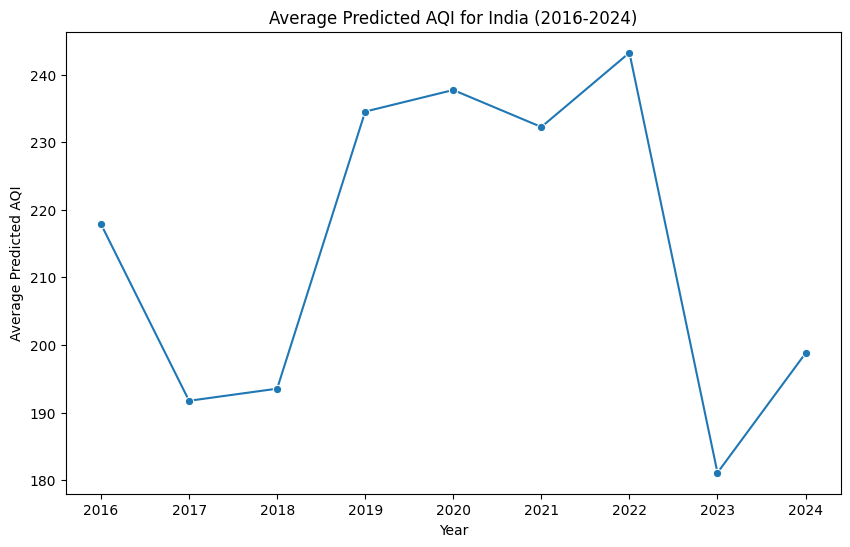

In [ ]:
import numpy as np
import pandas as pd
import itertools

soi_25, soi_75 = airq_m['SOi'].quantile([0.25, 0.75])
noi_25, noi_75 = airq_m['Noi'].quantile([0.25, 0.75])
rpi_25, rpi_75 = airq_m['Rpi'].quantile([0.25, 0.75])


# Define the states and year range
states = ["Maharashtra", "Uttar Pradesh", "Andhra Pradesh", "Punjab", "Rajasthan", "Kerala",
          "Himachal Pradesh", "West Bengal", "Gujarat", "Tamil Nadu", "Madhya Pradesh", "Assam",
          "Odisha", "Karnataka", "Delhi", "Chandigarh", "Chhattisgarh", "Goa", "Jharkhand",
          "Mizoram", "Telangana", "Meghalaya", "Puducherry", "Haryana", "Nagaland", "Bihar",
          "Uttarakhand", "Jammu & Kashmir", "Daman & Diu", "Dadra & Nagar Haveli", "Uttaranchal",
          "Arunachal Pradesh", "Manipur", "Sikkim"]

years = list(range(2016, 2025))

# Create a DataFrame with all state-year combinations
future_data = pd.DataFrame(list(itertools.product(states, years)), columns=["state", "year"])

# Generate random values within derived ranges
np.random.seed(42)  # For reproducibility
future_data["SOi"] = np.random.uniform(soi_25, soi_75, len(future_data))
future_data["Noi"] = np.random.uniform(noi_25, noi_75, len(future_data))
future_data["Rpi"] = np.random.uniform(rpi_25, rpi_75, len(future_data))

# Apply one-hot encoding to 'state' and scaling to numerical features
future_data_encoded = pd.get_dummies(future_data, columns=["state"])

# Standardize the numerical features
scaler = StandardScaler()
numerical_features = ['SOi', 'Noi', 'Rpi', 'year']
future_data_encoded[numerical_features] = scaler.fit_transform(future_data_encoded[numerical_features])


# Define the correct features from the training data
training_feature_names = ['SOi', 'Noi', 'Rpi', 'year'] + [col for col in pred.columns if col.startswith('state_')]

# Reorder the future data to match the correct features
future_data_encoded = future_data_encoded[training_feature_names]

# Make predictions with the corrected future data
future_aqi_predictions = model.predict(future_data_encoded)

# Add the predictions to the future data
future_data["Predicted_AQI"] = future_aqi_predictions

average_aqi_per_year = future_data.groupby("year")["Predicted_AQI"].mean().reset_index()

# Create a line plot for the average predicted AQI over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_aqi_per_year, x='year', y='Predicted_AQI', marker='o')
plt.title('Average Predicted AQI for India (2016-2024)')
plt.xlabel('Year')
plt.ylabel('Average Predicted AQI')
plt.show()


RSPM (Respirable Suspended Particulate Matter),
NO2 (Nitrogen Dioxide),
SO2 (Sulfur Dioxide) are common air pollutants with various causes and impacts.
### Respirable Suspended Particulate Matter (RSPM):

**Causes:**
1. **Industrial Activities:** Emissions from industries such as manufacturing, construction, and mining release particulate matter into the air.
2. **Vehicle Emissions:** Exhaust emissions from vehicles, especially those using diesel fuel, contribute significantly to RSPM levels.
3. **Biomass Burning:** The burning of wood, crop residues, and other biomass for cooking and heating releases particulates into the atmosphere.
4. **Construction and Demolition:** Dust generated from construction and demolition activities adds to RSPM levels.
5. **Natural Sources:** Dust storms, wildfires, and volcanic eruptions also contribute to RSPM levels.

**Policy Interventions:**
1. **Emission Standards:** Governments enforce regulations mandating industries and vehicles to adhere to emission standards, thereby reducing particulate emissions.
2. **Vehicle Regulations:** Policies promoting the use of cleaner fuels, incentivizing electric vehicles, and implementing emission testing programs help reduce vehicle emissions.
3. **Cleaner Technologies:** Encouraging industries to adopt cleaner production technologies and practices helps reduce particulate emissions.
4. **Public Awareness:** Campaigns promoting clean air practices and discouraging activities like open burning help mitigate RSPM levels.

**Factors Influencing Presence:**
1. **Topography:** Geographical features like valleys or basins can trap particulate matter, leading to higher concentrations in certain areas.
2. **Weather Conditions:** Stagnant weather conditions with low wind speeds can lead to the accumulation of pollutants, exacerbating RSPM levels.
3. **Urbanization:** Urban areas with high population density and increased industrial activities often experience elevated RSPM levels due to higher emissions.

### Nitrogen Dioxide (NO2):

**Causes:**
1. **Vehicle Emissions:** Combustion engines, particularly in diesel vehicles, emit NO2 as a byproduct of fuel combustion.
2. **Industrial Processes:** Combustion of fossil fuels in power plants and industrial facilities releases NO2 into the atmosphere.
3. **Agricultural Activities:** Use of nitrogen-based fertilizers in agriculture can lead to NO2 emissions through processes like nitrification and denitrification.
4. **Biomass Burning:** Similar to RSPM, burning of biomass for cooking and heating also releases NO2.

**Policy Interventions:**
1. **Emission Standards:** Governments set limits on NO2 emissions from vehicles and industries, enforcing compliance through regulations.
2. **Alternative Transportation:** Promoting public transportation, cycling, and walking reduces reliance on private vehicles, thereby lowering NO2 emissions.
3. **Clean Energy:** Policies supporting renewable energy sources and phasing out coal-fired power plants help reduce NO2 emissions from energy generation.
4. **Vehicle Regulations:** Implementing vehicle emission testing programs and incentivizing the adoption of electric and hybrid vehicles reduces NO2 emissions from transportation.

**Factors Influencing Presence:**
1. **Traffic Density:** Areas with heavy traffic, such as urban centers and transportation hubs, often experience elevated NO2 levels due to vehicle emissions.
2. **Industrial Zones:** Proximity to industrial facilities and power plants can result in higher NO2 concentrations in surrounding areas.
3. **Weather Conditions:** Atmospheric conditions like temperature inversions can trap pollutants close to the ground, leading to higher NO2 levels in certain areas.

### Sulfur Dioxide (SO2):

**Causes:**
1. **Industrial Processes:** Burning of fossil fuels containing sulfur, such as coal and oil, in power plants and industrial boilers releases SO2 into the air.
2. **Smelting Operations:** Metallurgical processes like smelting and refining release SO2 emissions.
3. **Volcanic Activity:** Volcanic eruptions release large amounts of SO2 into the atmosphere.
4. **Maritime Activities:** Ships burning high-sulfur fuels emit SO2, particularly in coastal areas and busy shipping lanes.

**Policy Interventions:**
1. **Emission Controls:** Governments enforce emission standards and require industries to install pollution control technologies like scrubbers to reduce SO2 emissions.
2. **Fuel Regulations:** Mandating the use of low-sulfur fuels in industries and shipping helps decrease SO2 emissions.
3. **Renewable Energy:** Shifting away from fossil fuels to renewable energy sources reduces SO2 emissions from power generation.
4. **International Agreements:** Participation in international agreements like the MARPOL Convention regulates sulfur content in marine fuels, curbing SO2 emissions from shipping.

**Factors Influencing Presence:**
1. **Industrial Activity:** Proximity to industrial areas and power plants is a significant determinant of SO2 concentrations in the air.
2. **Topography:** Geographic features can influence the dispersion of SO2 emissions, with valleys and low-lying areas experiencing higher concentrations.
3. **Wind Patterns:** Prevailing wind directions can transport SO2 emissions over long distances, affecting areas far from emission sources.
4. **Shipping Lanes:** Coastal regions and ports with heavy maritime traffic often experience elevated SO2 levels due to ship emissions.